## **Abstract**

This capstone project entails a thorough investigation and predictive modeling of a dataset encompassing health-related information from 1000 individuals, with the aim of determining cancer risk levels categorized as Low, Medium, or High. The data includes a diverse range of predictors such as demographic characteristics, environmental and lifestyle factors, genetic predispositions, and clinical symptoms, with the cancer risk level serving as the dependent variable. Initial efforts focus on data cleaning and feature selection, identifying key factors that significantly influence risk assessment. Subsequent exploratory data analysis (EDA) employs various statistical techniques and visualizations to unearth underlying patterns and distributions, ensuring a robust understanding of the data's characteristics and relationships. The project advances by applying and comparing multiple classification models to ascertain the most effective method for predicting cancer risk. This process not only facilitates the development of a predictive model but also emphasizes the importance of model interpretability, particularly through techniques like SHAP analysis, which elucidates how individual predictors shape the model's outcomes. Ultimately, the project highlights the potential of machine learning to significantly impact medical diagnostics, supporting earlier and more accurate detection of lung cancer risk which is crucial for improving patient prognosis and treatment strategies.

## **Part 1: Data Preparation and Feature Engineering**

In this initial phase of the project, the focus is on meticulously preparing the dataset and engineering the relevant features essential for effective model building. The process begins with a thorough cleaning of the data, which includes addressing missing values, eliminating duplicate entries, and correcting any inconsistencies in the data entries. Following the data cleaning, a critical step involves selecting the most impactful features that contribute to accurately predicting the cancer risk levels. This involves analyzing the relationship between independent variables and the dependent variable, and using statistical techniques and domain knowledge to retain only those features that provide meaningful insights into the cancer risk levels. This streamlined and refined dataset lays the foundation for the subsequent exploratory data analysis and predictive modeling stages.

In [ ]:
#installing dependencies
!pip install eli5

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot

In [ ]:
#To read the lung cancer patient dataset from local machine
from google.colab import files
uploaded = files.upload()

Saving cancer patient data sets.csv to cancer patient data sets (1).csv


In [ ]:
#To check if correct file is read, displaying a few rows from dataset
data = pd.read_csv("cancer patient data sets.csv")

In [ ]:
data.head()

index Patient Id  Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0      0         P1   33       1              2            4             5   
1      1        P10   17       1              3            1             5   
2      2       P100   35       1              4            5             6   
3      3      P1000   37       1              7            7             7   
4      4       P101   46       1              6            8             7   

   OccuPational Hazards  Genetic Risk  chronic Lung Disease  ...  Fatigue  \
0                     4             3                     2  ...        3   
1                     3             4                     2  ...        1   
2                     5             5                     4  ...        8   
3                     7             6                     7  ...        4   
4                     7             7                     6  ...        3   

   Weight Loss  Shortness of Breath  Wheezing  Swallowing Difficulty  \
0            4                    2         2                      3   
1            3                    7         8                      6   
2            7                    9         2                      1   
3            2                    3         1                      4   
4            2                    4         1                      4   

   Clubbing of Finger Nails  Frequent Cold  Dry Cough  Snoring   Level  
0                         1              2          3        4     Low  
1                         2              1          7        2  Medium  
2                         4              6          7        2    High  
3                         5              6          7        5    High  
4                         2              4          2        3    High  

[5 rows x 26 columns]

In [ ]:
data_ad = data

In [ ]:
data_ad.columns

Index(['index', 'Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

In [ ]:
#To check the data types in the given file
data_ad.dtypes

index                        int64
Patient Id                  object
Age                          int64
Gender                       int64
Air Pollution                int64
Alcohol use                  int64
Dust Allergy                 int64
OccuPational Hazards         int64
Genetic Risk                 int64
chronic Lung Disease         int64
Balanced Diet                int64
Obesity                      int64
Smoking                      int64
Passive Smoker               int64
Chest Pain                   int64
Coughing of Blood            int64
Fatigue                      int64
Weight Loss                  int64
Shortness of Breath          int64
Wheezing                     int64
Swallowing Difficulty        int64
Clubbing of Finger Nails     int64
Frequent Cold                int64
Dry Cough                    int64
Snoring                      int64
Level                       object
dtype: object

Above is the list of datatypes. Age is Numeric while all others are categorical datatypes

In [ ]:
#To check if there are any null values
data_ad.isnull().sum()

index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

There are no null values present in any of the entries in the dataset

In [ ]:
data_norm = data_ad

<Figure size 800x500 with 0 Axes>

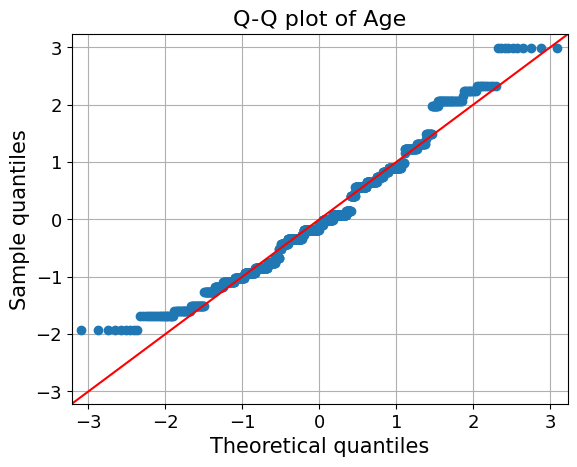

In [ ]:
from statsmodels.graphics.gofplots import qqplot

data_norm = data_ad[
    ['Age']
]
for c in data_norm.columns[:]:
    plt.figure(figsize=(8, 5))
    fig = qqplot(data_norm[c], line="45", fit="True")
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.xlabel("Theoretical quantiles", fontsize=15)
    plt.ylabel("Sample quantiles", fontsize=15)
    plt.title("Q-Q plot of {}".format(c), fontsize=16)
    plt.grid(True)
    plt.show()

Looking at the Q-Q plot above we can infer that the independent numeric variable 'Age' is roughly following a normal distribution

In [ ]:
data_ad.columns

Index(['index', 'Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

a) Q-Q Plot

In [ ]:
data_norm = data_ad

In [ ]:
data_norm.head()

index Patient Id  Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0      0         P1   33       1              2            4             5   
1      1        P10   17       1              3            1             5   
2      2       P100   35       1              4            5             6   
3      3      P1000   37       1              7            7             7   
4      4       P101   46       1              6            8             7   

   OccuPational Hazards  Genetic Risk  chronic Lung Disease  ...  Fatigue  \
0                     4             3                     2  ...        3   
1                     3             4                     2  ...        1   
2                     5             5                     4  ...        8   
3                     7             6                     7  ...        4   
4                     7             7                     6  ...        3   

   Weight Loss  Shortness of Breath  Wheezing  Swallowing Difficulty  \
0            4                    2         2                      3   
1            3                    7         8                      6   
2            7                    9         2                      1   
3            2                    3         1                      4   
4            2                    4         1                      4   

   Clubbing of Finger Nails  Frequent Cold  Dry Cough  Snoring   Level  
0                         1              2          3        4     Low  
1                         2              1          7        2  Medium  
2                         4              6          7        2    High  
3                         5              6          7        5    High  
4                         2              4          2        3    High  

[5 rows x 26 columns]

<Figure size 800x500 with 0 Axes>

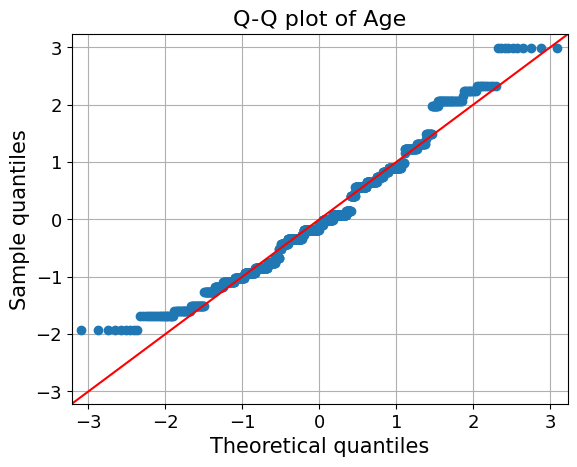

<Figure size 800x500 with 0 Axes>

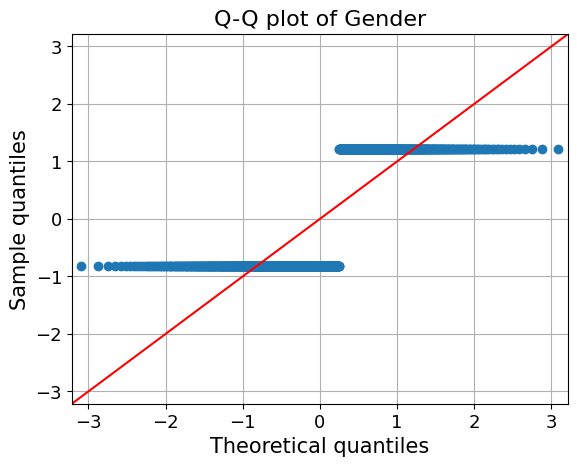

<Figure size 800x500 with 0 Axes>

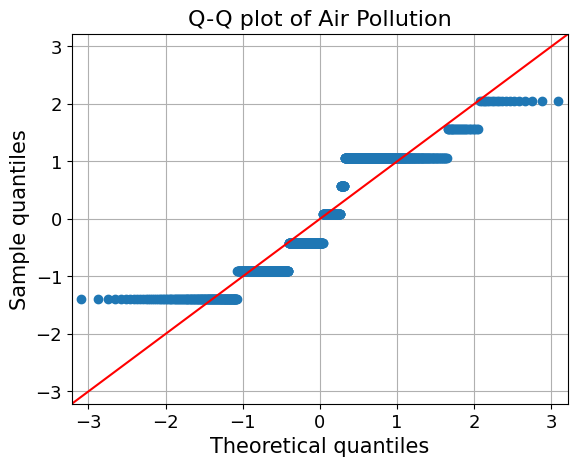

<Figure size 800x500 with 0 Axes>

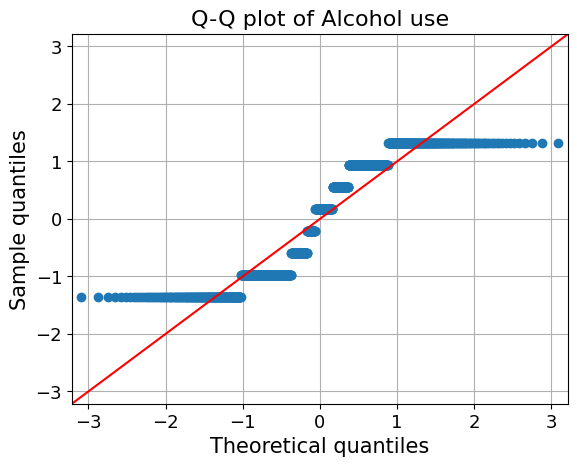

<Figure size 800x500 with 0 Axes>

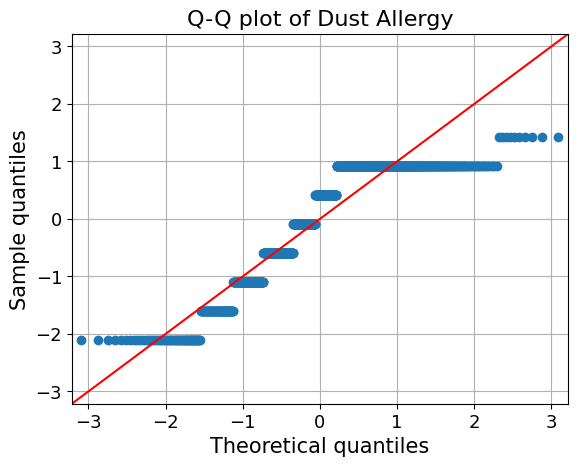

In [ ]:
from statsmodels.graphics.gofplots import qqplot
data_norm = data_ad[
    ['Age', 'Gender', 'Air Pollution', 'Alcohol use','Dust Allergy']
]
for c in data_norm.columns[:]:
    plt.figure(figsize=(8, 5))
    fig = qqplot(data_norm[c], line="45", fit="True")
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.xlabel("Theoretical quantiles", fontsize=15)
    plt.ylabel("Sample quantiles", fontsize=15)
    plt.title("Q-Q plot of {}".format(c), fontsize=16)
    plt.grid(True)
    plt.show()

b) Box Plot

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23],
 [Text(0, 0, 'index'),
  Text(1, 0, 'Age'),
  Text(2, 0, 'Gender'),
  Text(3, 0, 'Air Pollution'),
  Text(4, 0, 'Alcohol use'),
  Text(5, 0, 'Dust Allergy'),
  Text(6, 0, 'OccuPational Hazards'),
  Text(7, 0, 'Genetic Risk'),
  Text(8, 0, 'chronic Lung Disease'),
  Text(9, 0, 'Balanced Diet'),
  Text(10, 0, 'Obesity'),
  Text(11, 0, 'Smoking'),
  Text(12, 0, 'Passive Smoker'),
  Text(13, 0, 'Chest Pain'),
  Text(14, 0, 'Coughing of Blood'),
  Text(15, 0, 'Fatigue'),
  Text(16, 0, 'Weight Loss'),
  Text(17, 0, 'Shortness of Breath'),
  Text(18, 0, 'Wheezing'),
  Text(19, 0, 'Swallowing Difficulty'),
  Text(20, 0, 'Clubbing of Finger Nails'),
  Text(21, 0, 'Frequent Cold'),
  Text(22, 0, 'Dry Cough'),
  Text(23, 0, 'Snoring')])

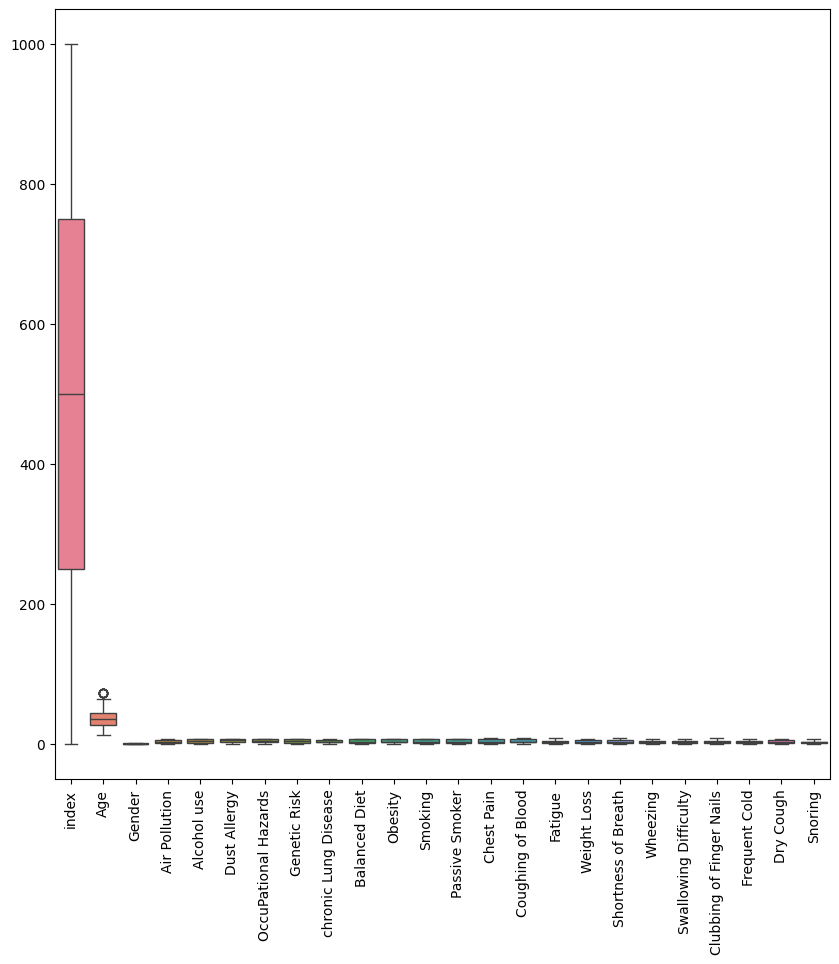

In [ ]:
#Using box-plot to predict a target variable using independent variables
plt.figure(figsize=(10, 10))
sns.boxplot(data=data)
plt.xticks(rotation = 90)

c) Correlation Heat Map

In [ ]:
#Plotting the heat map of the correlation
data_ad.corr

<bound method DataFrame.corr of      index Patient Id  Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0        0         P1   33       1              2            4             5   
1        1        P10   17       1              3            1             5   
2        2       P100   35       1              4            5             6   
3        3      P1000   37       1              7            7             7   
4        4       P101   46       1              6            8             7   
..     ...        ...  ...     ...            ...          ...           ...   
995    995       P995   44       1              6            7             7   
996    996       P996   37       2              6            8             7   
997    997       P997   25       2              4            5             6   
998    998       P998   18       2              6            8             7   
999    999       P999   47       1              6            5             6   

     OccuPational Hazards  Genetic Risk  chronic Lung Disease  ...  Fatigue  \
0                       4             3                     2  ...        3   
1                       3             4                     2  ...        1   
2                       5             5                     4  ...        8   
3                       7             6                     7  ...        4   
4                       7             7                     6  ...        3   
..                    ...           ...                   ...  ...      ...   
995                     7             7                     6  ...        5   
996                     7             7                     6  ...        9   
997                     5             5                     4  ...        8   
998                     7             7                     6  ...        3   
999                     5             5                     4  ...        8   

     Weight Loss  Shortness of Breath  Wheezing  Swallowing Difficulty  \
0              4                    2         2                      3   
1              3                    7         8                      6   
2              7                    9         2                      1   
3              2                    3         1                      4   
4              2                    4         1                      4   
..           ...                  ...       ...                    ...   
995            3                    2         7                      8   
996            6                    5         7                      2   
997            7                    9         2                      1   
998            2                    4         1                      4   
999            7                    9         2                      1   

     Clubbing of Finger Nails  Frequent Cold  Dry Cough  Snoring   Level  
0                           1              2          3        4     Low  
1                           2              1          7        2  Medium  
2                           4              6          7        2    High  
3                           5              6          7        5    High  
4                           2              4          2        3    High  
..                        ...            ...        ...      ...     ...  
995                         2              4          5        3    High  
996                         4              3          1        4    High  
997                         4              6          7        2    High  
998                         2              4          2        3    High  
999                         4              6          7        2    High  

[1000 rows x 26 columns]>

<ipython-input-19-22884c03c2e8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_ad.corr(), annot=True, cmap="RdYlGn")


<Axes: >

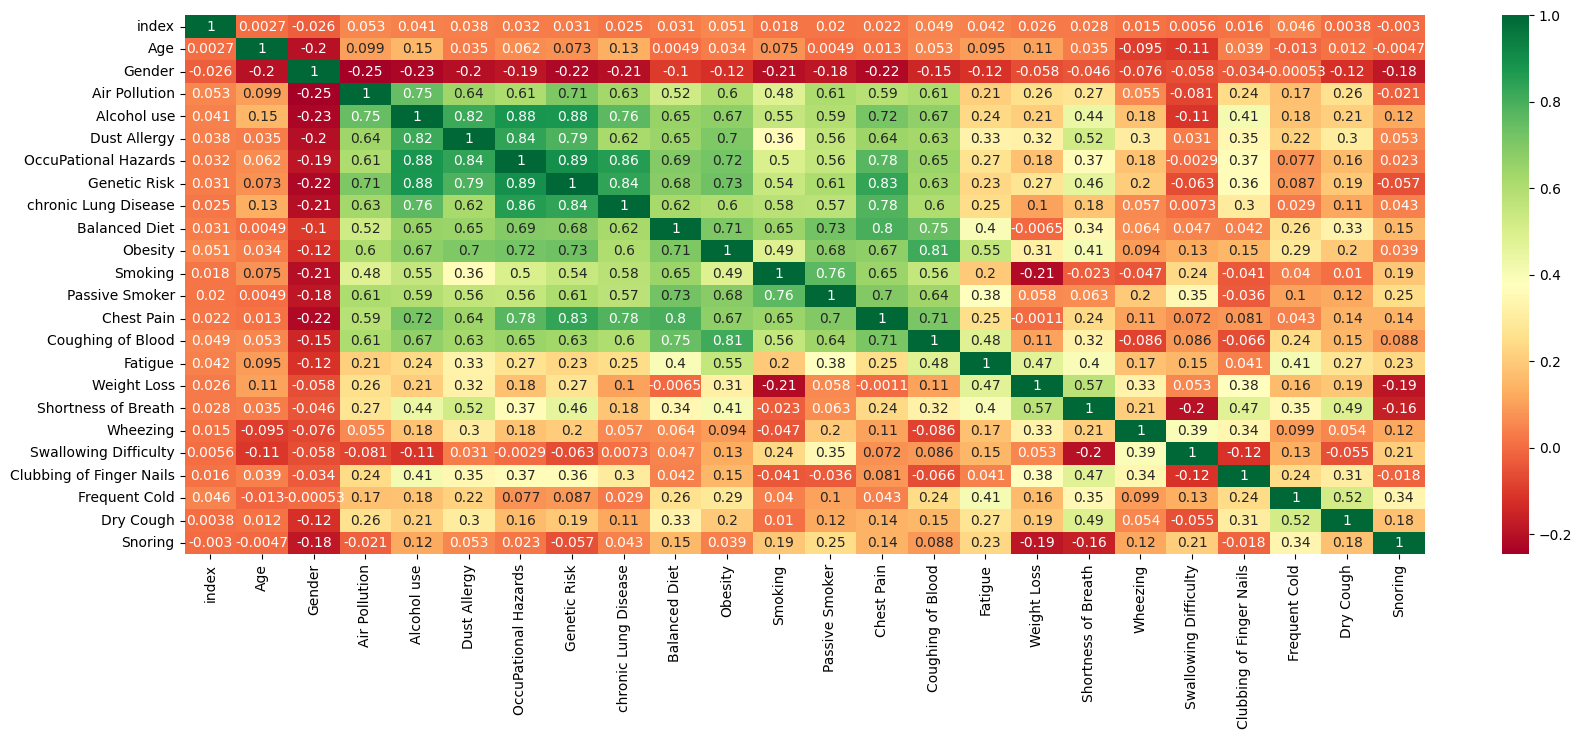

In [ ]:
plt.figure(figsize=(20, 7))
sns.heatmap(data_ad.corr(), annot=True, cmap="RdYlGn")

In [ ]:
x=['Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring']
y=['Level']

In [ ]:
#To check if any independent variables have missing values
data_ad.isnull().sum()

index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

None of the independent variables have missing data present in them.

In [ ]:
#Dividing the dataset into training and test sets
from sklearn.model_selection import train_test_split

In [ ]:
data.head()

index Patient Id  Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0      0         P1   33       1              2            4             5   
1      1        P10   17       1              3            1             5   
2      2       P100   35       1              4            5             6   
3      3      P1000   37       1              7            7             7   
4      4       P101   46       1              6            8             7   

   OccuPational Hazards  Genetic Risk  chronic Lung Disease  ...  Fatigue  \
0                     4             3                     2  ...        3   
1                     3             4                     2  ...        1   
2                     5             5                     4  ...        8   
3                     7             6                     7  ...        4   
4                     7             7                     6  ...        3   

   Weight Loss  Shortness of Breath  Wheezing  Swallowing Difficulty  \
0            4                    2         2                      3   
1            3                    7         8                      6   
2            7                    9         2                      1   
3            2                    3         1                      4   
4            2                    4         1                      4   

   Clubbing of Finger Nails  Frequent Cold  Dry Cough  Snoring   Level  
0                         1              2          3        4     Low  
1                         2              1          7        2  Medium  
2                         4              6          7        2    High  
3                         5              6          7        5    High  
4                         2              4          2        3    High  

[5 rows x 26 columns]

In [ ]:
# Splitting into features (X) and target variable (y)
y = data_ad['Level'].copy()  # Correct way to access the 'Level' column
X = data_ad.drop(columns=['Level'])  # Correct way to drop the 'Level' column

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4000)

# Display the first few rows of train and test datasets
print("\nTrain dataset - First few rows:")
display(X_train.head())
display(y_train.head())

print("\nTest dataset - First few rows:")
display(X_test.head())
display(y_test.head())


Train dataset - First few rows:


index Patient Id  Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
967    967        P97   47       1              6            5             6   
857    857       P870   52       2              1            2             3   
575    575       P616   24       1              6            8             7   
800    800       P819   29       2              6            7             7   
602    602       P640   35       1              1            3             2   

     OccuPational Hazards  Genetic Risk  chronic Lung Disease  ...  \
967                     5             5                     4  ...   
857                     4             2                     4  ...   
575                     7             6                     7  ...   
800                     7             7                     6  ...   
602                     4             2                     6  ...   

     Coughing of Blood  Fatigue  Weight Loss  Shortness of Breath  Wheezing  \
967                  8        8            7                    9         2   
857                  4        4            1                    2         4   
575                  6        5            2                    5         2   
800                  7        2            7                    6         7   
602                  4        4            2                    2         2   

     Swallowing Difficulty  Clubbing of Finger Nails  Frequent Cold  \
967                      1                         4              6   
857                      6                         5              4   
575                      3                         2              1   
800                      6                         7              2   
602                      3                         2              1   

     Dry Cough  Snoring  
967          7        2  
857          2        5  
575          7        6  
800          3        1  
602          2        4  

[5 rows x 25 columns]

967      High
857    Medium
575      High
800      High
602       Low
Name: Level, dtype: object


Test dataset - First few rows:


index Patient Id  Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
146    146        P23   35       2              2            6             2   
285    285       P355   45       2              1            2             3   
861    861       P874   31       2              3            2             4   
216    216       P293   37       2              7            7             7   
627    627       P663   38       2              2            1             5   

     OccuPational Hazards  Genetic Risk  chronic Lung Disease  ...  \
146                     3             6                     6  ...   
285                     4             2                     4  ...   
861                     2             3                     2  ...   
216                     7             6                     7  ...   
627                     3             2                     3  ...   

     Coughing of Blood  Fatigue  Weight Loss  Shortness of Breath  Wheezing  \
146                  6        5            5                    4         6   
285                  4        4            1                    2         4   
861                  3        4            5                    6         5   
216                  8        4            2                    3         1   
627                  4        6            7                    2         5   

     Swallowing Difficulty  Clubbing of Finger Nails  Frequent Cold  \
146                      5                         4              6   
285                      6                         5              4   
861                      5                         4              6   
216                      4                         5              6   
627                      8                         1              3   

     Dry Cough  Snoring  
146          5        7  
285          2        5  
861          5        4  
216          7        5  
627          2        3  

[5 rows x 25 columns]

146      High
285    Medium
861    Medium
216      High
627    Medium
Name: Level, dtype: object

The training and test data does not contain the same data as it gets divided; 20% is test data and 80% is train data.

In [ ]:
data_ad.head()

index Patient Id  Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0      0         P1   33       1              2            4             5   
1      1        P10   17       1              3            1             5   
2      2       P100   35       1              4            5             6   
3      3      P1000   37       1              7            7             7   
4      4       P101   46       1              6            8             7   

   OccuPational Hazards  Genetic Risk  chronic Lung Disease  ...  Fatigue  \
0                     4             3                     2  ...        3   
1                     3             4                     2  ...        1   
2                     5             5                     4  ...        8   
3                     7             6                     7  ...        4   
4                     7             7                     6  ...        3   

   Weight Loss  Shortness of Breath  Wheezing  Swallowing Difficulty  \
0            4                    2         2                      3   
1            3                    7         8                      6   
2            7                    9         2                      1   
3            2                    3         1                      4   
4            2                    4         1                      4   

   Clubbing of Finger Nails  Frequent Cold  Dry Cough  Snoring   Level  
0                         1              2          3        4     Low  
1                         2              1          7        2  Medium  
2                         4              6          7        2    High  
3                         5              6          7        5    High  
4                         2              4          2        3    High  

[5 rows x 26 columns]

<Axes: >

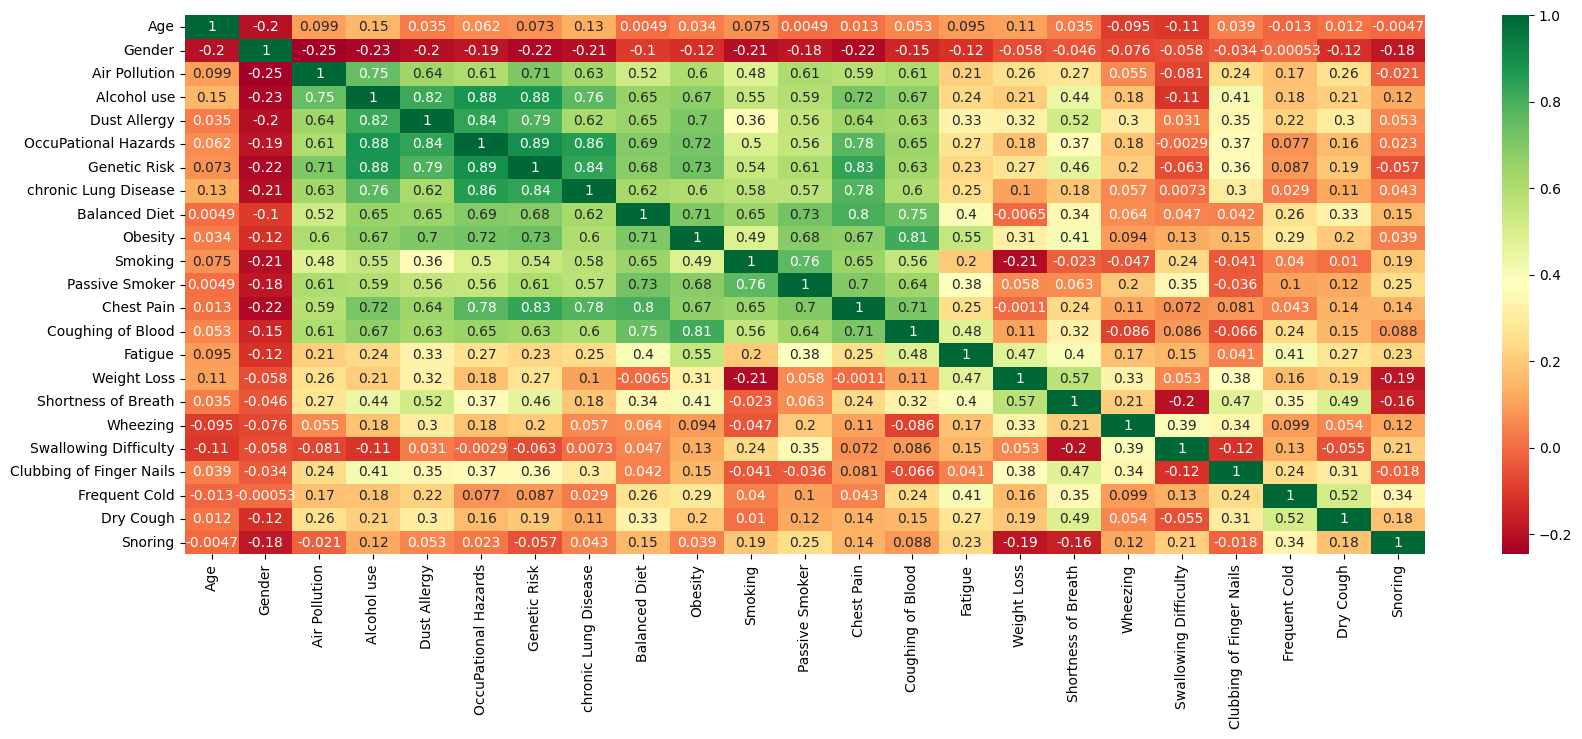

In [ ]:
data_norm = data_ad[
    ['Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring']
]

plt.figure(figsize=(20, 7))
sns.heatmap(data_norm.corr(), annot=True, cmap="RdYlGn")


The heat map represents the correlation matrix of the predictor variables

The values close to 1 implies a strong positive correlation (i.e., as one variable increases, the other tends to increase).
The values close to -1 implies a strong negative correlation (i.e., as one variable increases, the other tends to decrease).
The values close to 0 implies little to no linear correlation between the variables.

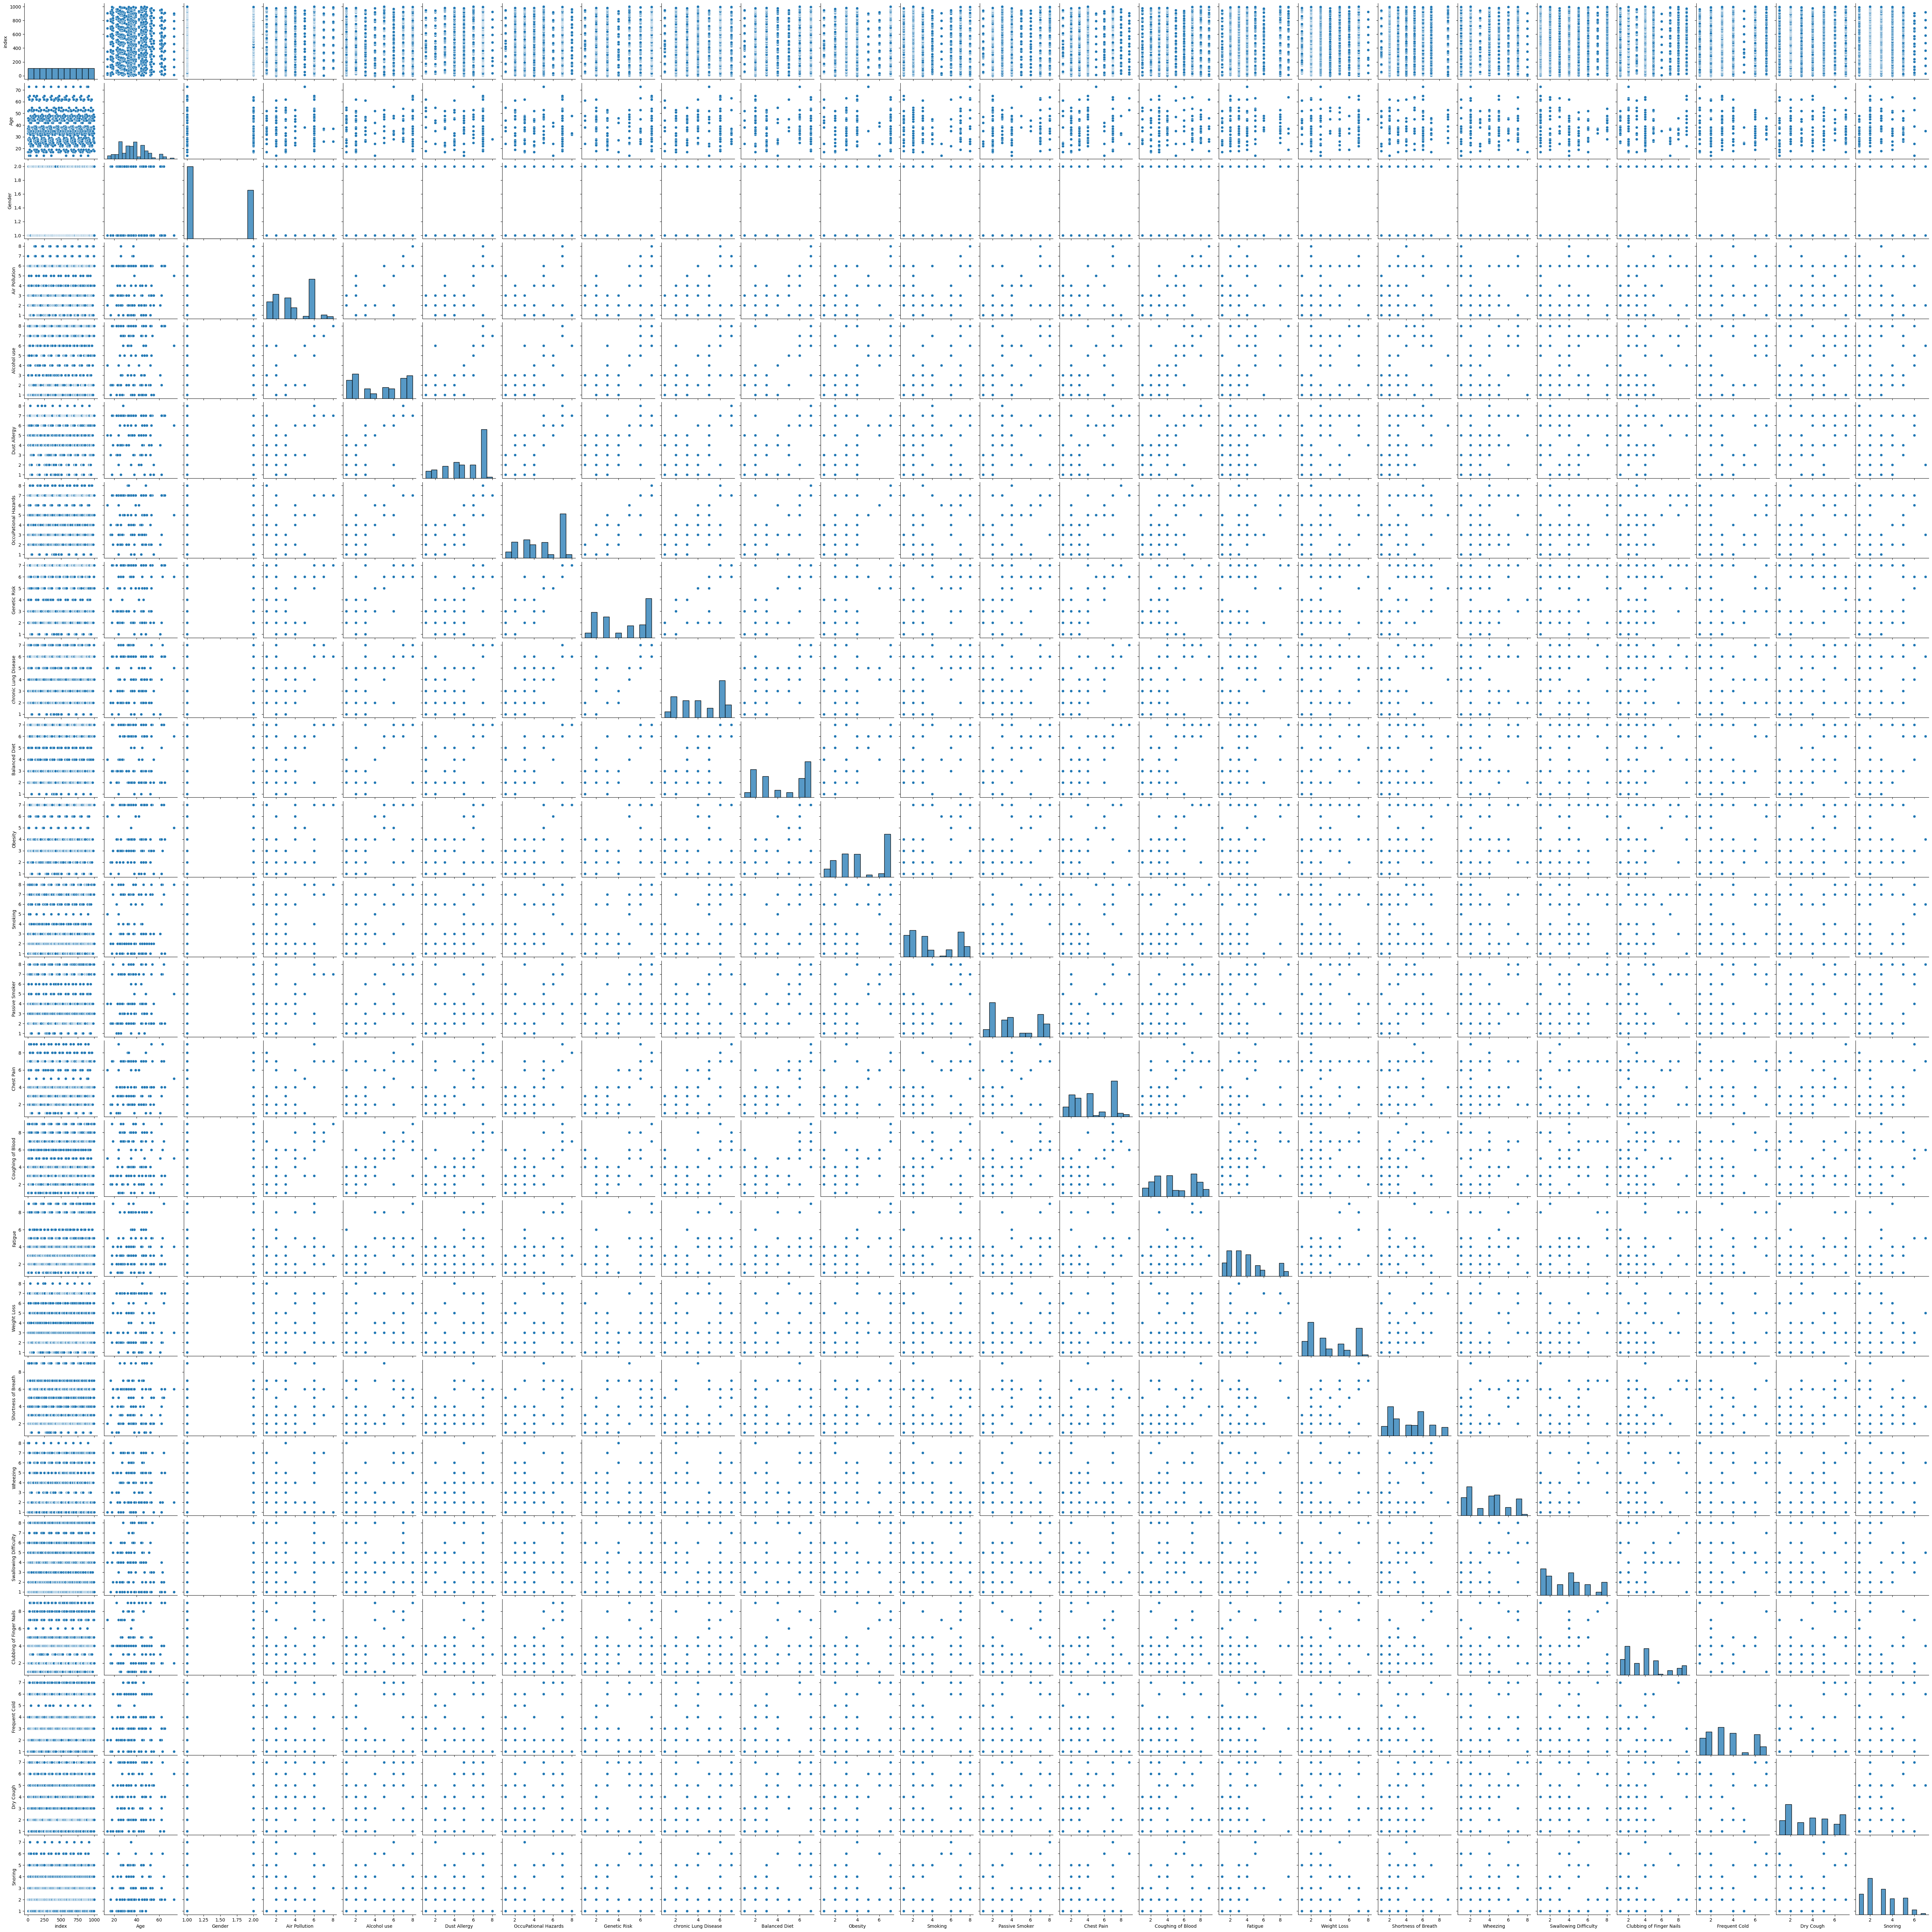

In [ ]:
 sns.pairplot(data_ad)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

#Firstly replacing the values of Level
data_ad=data_ad.replace({'Level':{'Low': 1, 'Medium': 2, 'High': 3}})

# Define independent variables (X) and target variable (y)
X = data_ad.drop(columns=["Level", "Patient Id"])  # Drop non-numeric and identifier columns
y = data_ad["Level"]

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get the feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to display feature importances
features_data_ad = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

features_data_ad

Feature  Importance
10                   Obesity    0.364857
14         Coughing of Blood    0.161252
18                  Wheezing    0.105059
4                Alcohol use    0.092054
15                   Fatigue    0.061254
23                   Snoring    0.053500
12            Passive Smoker    0.035147
3              Air Pollution    0.020794
7               Genetic Risk    0.019170
20  Clubbing of Finger Nails    0.015269
17       Shortness of Breath    0.013182
19     Swallowing Difficulty    0.013125
9              Balanced Diet    0.012767
5               Dust Allergy    0.008349
6       OccuPational Hazards    0.008221
13                Chest Pain    0.007387
8       chronic Lung Disease    0.002107
22                 Dry Cough    0.001967
11                   Smoking    0.001861
21             Frequent Cold    0.001777
16               Weight Loss    0.000899
1                        Age    0.000000
2                     Gender    0.000000
0                      index    0.000000

The Random Forest Regressor model is used here to find which predictor variables are the most important

In [ ]:
# Re-run the feature importance extraction to get the top features
# (assuming 'X_encoded' and 'y' are already defined from previous steps).

# Fit the Random Forest model
model = RandomForestRegressor(random_state=0)
model.fit(X, y)

# Get the feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to display feature importances
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Get the top most important features (let's take the top 3 for this example)
top_features = features_df.head(3)['Feature']

# Now output the summary statistics for these top features
summary_statistics = data[top_features].describe()
summary_statistics

Obesity  Coughing of Blood     Wheezing
count  1000.000000        1000.000000  1000.000000
mean      4.465000           4.859000     3.777000
std       2.124921           2.427965     2.041921
min       1.000000           1.000000     1.000000
25%       3.000000           3.000000     2.000000
50%       4.000000           4.000000     4.000000
75%       7.000000           7.000000     5.000000
max       7.000000           9.000000     8.000000

From the above data we can infer that

The range of Coughing of Blood (8) is the widest among the three variables, indicating the most variability in this predictor.
Obesity has the narrowest range (6), suggesting comparatively less variability compared to Coughing of Blood and Wheezing.
Wheezing falls in between with a range of 7.

In [ ]:
distribution_summary = X.describe()

In [ ]:
distribution_summary

index          Age       Gender  Air Pollution  Alcohol use  \
count  1000.000000  1000.000000  1000.000000      1000.0000  1000.000000   
mean    499.500000    37.174000     1.402000         3.8400     4.563000   
std     288.819436    12.005493     0.490547         2.0304     2.620477   
min       0.000000    14.000000     1.000000         1.0000     1.000000   
25%     249.750000    27.750000     1.000000         2.0000     2.000000   
50%     499.500000    36.000000     1.000000         3.0000     5.000000   
75%     749.250000    45.000000     2.000000         6.0000     7.000000   
max     999.000000    73.000000     2.000000         8.0000     8.000000   

       Dust Allergy  OccuPational Hazards  Genetic Risk  chronic Lung Disease  \
count   1000.000000           1000.000000   1000.000000           1000.000000   
mean       5.165000              4.840000      4.580000              4.380000   
std        1.980833              2.107805      2.126999              1.848518   
min        1.000000              1.000000      1.000000              1.000000   
25%        4.000000              3.000000      2.000000              3.000000   
50%        6.000000              5.000000      5.000000              4.000000   
75%        7.000000              7.000000      7.000000              6.000000   
max        8.000000              8.000000      7.000000              7.000000   

       Balanced Diet  ...  Coughing of Blood      Fatigue  Weight Loss  \
count    1000.000000  ...        1000.000000  1000.000000  1000.000000   
mean        4.491000  ...           4.859000     3.856000     3.855000   
std         2.135528  ...           2.427965     2.244616     2.206546   
min         1.000000  ...           1.000000     1.000000     1.000000   
25%         2.000000  ...           3.000000     2.000000     2.000000   
50%         4.000000  ...           4.000000     3.000000     3.000000   
75%         7.000000  ...           7.000000     5.000000     6.000000   
max         7.000000  ...           9.000000     9.000000     8.000000   

       Shortness of Breath     Wheezing  Swallowing Difficulty  \
count          1000.000000  1000.000000            1000.000000   
mean              4.240000     3.777000               3.746000   
std               2.285087     2.041921               2.270383   
min               1.000000     1.000000               1.000000   
25%               2.000000     2.000000               2.000000   
50%               4.000000     4.000000               4.000000   
75%               6.000000     5.000000               5.000000   
max               9.000000     8.000000               8.000000   

       Clubbing of Finger Nails  Frequent Cold    Dry Cough      Snoring  
count               1000.000000    1000.000000  1000.000000  1000.000000  
mean                   3.923000       3.536000     3.853000     2.926000  
std                    2.388048       1.832502     2.039007     1.474686  
min                    1.000000       1.000000     1.000000     1.000000  
25%                    2.000000       2.000000     2.000000     2.000000  
50%                    4.000000       3.000000     4.000000     3.000000  
75%                    5.000000       5.000000     6.000000     4.000000  
max                    9.000000       7.000000     7.000000     7.000000  

[8 rows x 24 columns]

1. Removing the outliers

In [ ]:
data_ad

index Patient Id  Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0        0         P1   33       1              2            4             5   
1        1        P10   17       1              3            1             5   
2        2       P100   35       1              4            5             6   
3        3      P1000   37       1              7            7             7   
4        4       P101   46       1              6            8             7   
..     ...        ...  ...     ...            ...          ...           ...   
995    995       P995   44       1              6            7             7   
996    996       P996   37       2              6            8             7   
997    997       P997   25       2              4            5             6   
998    998       P998   18       2              6            8             7   
999    999       P999   47       1              6            5             6   

     OccuPational Hazards  Genetic Risk  chronic Lung Disease  ...  Fatigue  \
0                       4             3                     2  ...        3   
1                       3             4                     2  ...        1   
2                       5             5                     4  ...        8   
3                       7             6                     7  ...        4   
4                       7             7                     6  ...        3   
..                    ...           ...                   ...  ...      ...   
995                     7             7                     6  ...        5   
996                     7             7                     6  ...        9   
997                     5             5                     4  ...        8   
998                     7             7                     6  ...        3   
999                     5             5                     4  ...        8   

     Weight Loss  Shortness of Breath  Wheezing  Swallowing Difficulty  \
0              4                    2         2                      3   
1              3                    7         8                      6   
2              7                    9         2                      1   
3              2                    3         1                      4   
4              2                    4         1                      4   
..           ...                  ...       ...                    ...   
995            3                    2         7                      8   
996            6                    5         7                      2   
997            7                    9         2                      1   
998            2                    4         1                      4   
999            7                    9         2                      1   

     Clubbing of Finger Nails  Frequent Cold  Dry Cough  Snoring  Level  
0                           1              2          3        4      1  
1                           2              1          7        2      2  
2                           4              6          7        2      3  
3                           5              6          7        5      3  
4                           2              4          2        3      3  
..                        ...            ...        ...      ...    ...  
995                         2              4          5        3      3  
996                         4              3          1        4      3  
997                         4              6          7        2      3  
998                         2              4          2        3      3  
999                         4              6          7        2      3  

[1000 rows x 26 columns]

In [ ]:
#  Function to remove outliers
def remove_outliers(data_ad, columns):
    for column in columns:
        if data_ad[column].dtype != 'object':  # Ensure the column is numeric
            Q1 = data_ad[column].quantile(0.25)
            Q3 = data_ad[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # To Exclude outliers
            data_ad = data_ad[(data_ad[column] >= lower_bound) & (data_ad[column] <= upper_bound)]
    return data_ad

# Get the list of columns from which to remove outliers
# Assuming the target variable 'Level' is not to be included
columns_to_check = [column for column in data_ad.columns if column != 'Level']

# Remove outliers from these columns
data_ad_no_outliers = remove_outliers(data_ad, columns_to_check)

# Check the results
print("Original data shape:", data_ad.shape)
print("Data without outliers shape:", data_ad_no_outliers.shape)

Original data shape: (1000, 26)
Data without outliers shape: (990, 26)


([0], [Text(0, 0, '')])

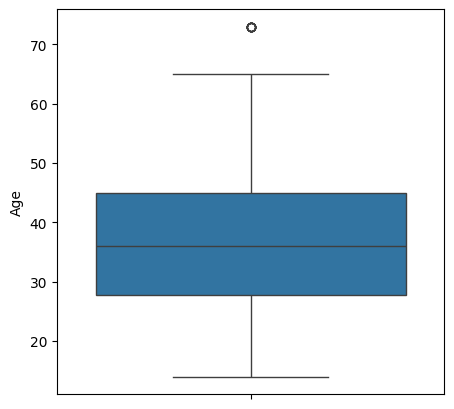

In [ ]:

plt.figure(figsize=(5, 5))
sns.boxplot(data=data_ad['Age'])
plt.xticks(rotation = 90)

Once we get rid of the outliers the overall accuracy of the model gets better. We focus more on the data that represents the normal condition. Overall the values become clearer

2. Keeping the outliers

In [ ]:
def keep_outliers(data_ad, columns):
    outliers = pd.DataFrame()
    for column in columns:
        Q1 = data_ad[column].quantile(0.25)
        Q3 = data_ad[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        column_outliers = data_ad[(data_ad[column] < lower_bound) | (data_ad[column] > upper_bound)]
        outliers = outliers.append(column_outliers)

    return outliers.drop_duplicates()

In [ ]:
import pandas as pd
# Display information about the dataset
data_ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [ ]:
import numpy as np

def remove_randomly(data_ad, percentage):
    """
    Remove a given percentage of values randomly from the dataframe.
    """
    # Calculate number of values to remove
    total_values = data_ad.shape[0] * data_ad.shape[1]
    number_to_remove = int(total_values * percentage)

    # Get random indices
    indices = [(row, col) for row in range(data_ad.shape[0]) for col in range(data_ad.shape[1])]
    np.random.shuffle(indices)
    selected_indices = indices[:number_to_remove]

    # Replace selected values with NaN
    data_ad_with_nan = data_ad.copy()
    for row, col in selected_indices:
        data_ad_with_nan.iat[row, col] = np.nan

    return data_ad_with_nan

# Creating datasets with 1%, 5%, and 10% of the data removed
data_1_percent = remove_randomly(data_ad, 0.01)
data_5_percent = remove_randomly(data_ad, 0.05)
data_10_percent = remove_randomly(data_ad, 0.10)

# Display the number of missing values in each dataset
missing_values_info = {
    "1% Missing": data_1_percent.isna().sum().sum(),
    "5% Missing": data_5_percent.isna().sum().sum(),
    "10% Missing": data_10_percent.isna().sum().sum()
}

missing_values_info


{'1% Missing': 260, '5% Missing': 1300, '10% Missing': 2600}

In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

# Extracting features and target
X = data.drop(['index', 'Patient Id', 'Level'], axis=1)  # Removing the non-essential columns
y = data['Level']

# Converting categorical variables to numerical
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Computing the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Computing the accuracy
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:")
print(cm)
print("Accuracy:", accuracy)

Confusion Matrix:
[[82  0  0]
 [ 0 55  0]
 [ 0  0 63]]
Accuracy: 1.0


In this specific confusion matrix:

Class 0: There were 82 instances correctly classified as class 0. Class 1: There were 55 instances correctly classified as class 1. Class 2: There were 63 instances correctly classified as class 2. Since there are no misclassifications (all non-diagonal elements are 0), it indicates that the model is performing perfectly without any errors on the test set.

An accuracy score of 1.0 indicates that the model has correctly classified all instances in the test set. It's the highest possible accuracy score and suggests that the model is performing exceptionally well on this particular dataset.

# **Part 2: Automated Machine Learning Integration**


In this segment of the project, the focus shifts to leveraging Automated Machine Learning (AutoML) technologies. AutoML represents a pivotal advancement in our approach, automating the process of applying machine learning models to real-world data. This technology simplifies the model selection and tuning process, enabling rapid experimentation and deployment of the most effective models without requiring extensive manual intervention. Through AutoML, we streamline the model development cycle, efficiently identifying optimal model configurations and hyperparameters. This not only accelerates the predictive analytics process but also enhances model accuracy and robustness by systematically evaluating numerous algorithms and their permutations. The utilization of AutoML ensures a comprehensive exploration of potential solutions, democratizing machine learning by making advanced analytical techniques more accessible

In [ ]:
!pip install xgboost

In [ ]:
# for outlier preprocessing
!pip install datasist

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn.model_selection import  train_test_split
from sklearn import metrics
from sklearn.model_selection import KFold
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [ ]:
!pip install requests
!pip install tabulate
!pip install future

In [ ]:
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html


Initiating H2O

In [ ]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.22" 2024-01-16; OpenJDK Runtime Environment (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1); OpenJDK 64-Bit Server VM (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpmi_xh6mi
  JVM stdout: /tmp/tmpmi_xh6mi/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpmi_xh6mi/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         07 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.46.0.1
H2O_cluster_version_age:    20 days
H2O_cluster_name:           H2O_from_python_unknownUser_uqwtfc
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.170 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

In [ ]:
data.head()

index Patient Id  Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0      0         P1   33       1              2            4             5   
1      1        P10   17       1              3            1             5   
2      2       P100   35       1              4            5             6   
3      3      P1000   37       1              7            7             7   
4      4       P101   46       1              6            8             7   

   OccuPational Hazards  Genetic Risk  chronic Lung Disease  ...  Fatigue  \
0                     4             3                     2  ...        3   
1                     3             4                     2  ...        1   
2                     5             5                     4  ...        8   
3                     7             6                     7  ...        4   
4                     7             7                     6  ...        3   

   Weight Loss  Shortness of Breath  Wheezing  Swallowing Difficulty  \
0            4                    2         2                      3   
1            3                    7         8                      6   
2            7                    9         2                      1   
3            2                    3         1                      4   
4            2                    4         1                      4   

   Clubbing of Finger Nails  Frequent Cold  Dry Cough  Snoring   Level  
0                         1              2          3        4     Low  
1                         2              1          7        2  Medium  
2                         4              6          7        2    High  
3                         5              6          7        5    High  
4                         2              4          2        3    High  

[5 rows x 26 columns]

In [ ]:
# Dropping the 'index' and 'Patient Id' columns
data_cleaned = data.drop(['index', 'Patient Id'], axis=1)

# Displaying the first few rows of the cleaned DataFrame to verify the columns are dropped
print(data_cleaned.head())

   Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0   33       1              2            4             5   
1   17       1              3            1             5   
2   35       1              4            5             6   
3   37       1              7            7             7   
4   46       1              6            8             7   

   OccuPational Hazards  Genetic Risk  chronic Lung Disease  Balanced Diet  \
0                     4             3                     2              2   
1                     3             4                     2              2   
2                     5             5                     4              6   
3                     7             6                     7              7   
4                     7             7                     6              7   

   Obesity  ...  Fatigue  Weight Loss  Shortness of Breath  Wheezing  \
0        4  ...        3            4                    2         2   
1        2  ...        1  

In [ ]:
import pandas as pd

# Assuming your dataset is already loaded into the 'data' DataFrame
# and you have dropped unnecessary columns as previously discussed

# Define your custom mapping for the 'Level' column
level_mapping = {'Low': 0, 'Medium': 1, 'High': 2}

# Use the map function to apply the mapping
data_cleaned['Level_encoded'] = data_cleaned['Level'].map(level_mapping)

# Display the first few rows to verify the new encoding
print(data_cleaned[['Level', 'Level_encoded']].head())

    Level  Level_encoded
0     Low              0
1  Medium              1
2    High              2
3    High              2
4    High              2


Here categorical data 'Level' is encoded into numerical data, making it suitable for further modelling. Categorical values of Level ('Low', 'Medium', 'High') are encoded into numerical values (0, 1, 2)

In [ ]:
data_cleaned

Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0     33       1              2            4             5   
1     17       1              3            1             5   
2     35       1              4            5             6   
3     37       1              7            7             7   
4     46       1              6            8             7   
..   ...     ...            ...          ...           ...   
995   44       1              6            7             7   
996   37       2              6            8             7   
997   25       2              4            5             6   
998   18       2              6            8             7   
999   47       1              6            5             6   

     OccuPational Hazards  Genetic Risk  chronic Lung Disease  Balanced Diet  \
0                       4             3                     2              2   
1                       3             4                     2              2   
2                       5             5                     4              6   
3                       7             6                     7              7   
4                       7             7                     6              7   
..                    ...           ...                   ...            ...   
995                     7             7                     6              7   
996                     7             7                     6              7   
997                     5             5                     4              6   
998                     7             7                     6              7   
999                     5             5                     4              6   

     Obesity  ...  Weight Loss  Shortness of Breath  Wheezing  \
0          4  ...            4                    2         2   
1          2  ...            3                    7         8   
2          7  ...            7                    9         2   
3          7  ...            2                    3         1   
4          7  ...            2                    4         1   
..       ...  ...          ...                  ...       ...   
995        7  ...            3                    2         7   
996        7  ...            6                    5         7   
997        7  ...            7                    9         2   
998        7  ...            2                    4         1   
999        7  ...            7                    9         2   

     Swallowing Difficulty  Clubbing of Finger Nails  Frequent Cold  \
0                        3                         1              2   
1                        6                         2              1   
2                        1                         4              6   
3                        4                         5              6   
4                        4                         2              4   
..                     ...                       ...            ...   
995                      8                         2              4   
996                      2                         4              3   
997                      1                         4              6   
998                      4                         2              4   
999                      1                         4              6   

     Dry Cough  Snoring   Level  Level_encoded  
0            3        4     Low              0  
1            7        2  Medium              1  
2            7        2    High              2  
3            7        5    High              2  
4            2        3    High              2  
..         ...      ...     ...            ...  
995          5        3    High              2  
996          1        4    High              2  
997          7        2    High              2  
998          2        3    High              2  
999          7        2    High              2  

[1000 rows x 25 columns]

Checking the correlation between all features in the data

In [ ]:
data_cleaned.corr()

<ipython-input-49-3916ffbefff7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_cleaned.corr()


Age    Gender  Air Pollution  Alcohol use  \
Age                       1.000000 -0.202086       0.099494     0.151742   
Gender                   -0.202086  1.000000      -0.246912    -0.227636   
Air Pollution             0.099494 -0.246912       1.000000     0.747293   
Alcohol use               0.151742 -0.227636       0.747293     1.000000   
Dust Allergy              0.035202 -0.204312       0.637503     0.818644   
OccuPational Hazards      0.062177 -0.192343       0.608924     0.878786   
Genetic Risk              0.073151 -0.222727       0.705276     0.877210   
chronic Lung Disease      0.128952 -0.205061       0.626701     0.763576   
Balanced Diet             0.004863 -0.099741       0.524873     0.653352   
Obesity                   0.034337 -0.123813       0.601468     0.669312   
Smoking                   0.075333 -0.206924       0.481902     0.547035   
Passive Smoker            0.004908 -0.184826       0.606764     0.592576   
Chest Pain                0.012864 -0.218426       0.585734     0.717242   
Coughing of Blood         0.053006 -0.146505       0.607829     0.667612   
Fatigue                   0.095059 -0.116467       0.211724     0.237245   
Weight Loss               0.106946 -0.057993       0.258016     0.207851   
Shortness of Breath       0.035329 -0.045972       0.269558     0.435785   
Wheezing                 -0.095354 -0.076304       0.055368     0.180817   
Swallowing Difficulty    -0.105833 -0.058324      -0.080918    -0.114073   
Clubbing of Finger Nails  0.039258 -0.034219       0.241065     0.414992   
Frequent Cold            -0.012706 -0.000526       0.174539     0.180778   
Dry Cough                 0.012128 -0.123001       0.261489     0.211277   
Snoring                  -0.004700 -0.181618      -0.021343     0.122694   
Level_encoded             0.060048 -0.164985       0.636038     0.718710   

                          Dust Allergy  OccuPational Hazards  Genetic Risk  \
Age                           0.035202              0.062177      0.073151   
Gender                       -0.204312             -0.192343     -0.222727   
Air Pollution                 0.637503              0.608924      0.705276   
Alcohol use                   0.818644              0.878786      0.877210   
Dust Allergy                  1.000000              0.835860      0.787904   
OccuPational Hazards          0.835860              1.000000      0.893049   
Genetic Risk                  0.787904              0.893049      1.000000   
chronic Lung Disease          0.619556              0.858284      0.836231   
Balanced Diet                 0.647197              0.691509      0.679905   
Obesity                       0.700676              0.722191      0.729826   
Smoking                       0.358691              0.497693      0.543259   
Passive Smoker                0.560002              0.555311      0.609071   
Chest Pain                    0.639983              0.775619      0.831751   
Coughing of Blood             0.625291              0.645947      0.632236   
Fatigue                       0.332472              0.267844      0.230530   
Weight Loss                   0.321756              0.176226      0.271743   
Shortness of Breath           0.518682              0.366482      0.458200   
Wheezing                      0.304850              0.178925      0.204973   
Swallowing Difficulty         0.031141             -0.002853     -0.062948   
Clubbing of Finger Nails      0.345714              0.366447      0.357815   
Frequent Cold                 0.219389              0.077166      0.087092   
Dry Cough                     0.300195              0.159887      0.194399   
Snoring                       0.052844              0.022916     -0.056831   
Level_encoded                 0.713839              0.673255      0.701303   

                          chronic Lung Disease  Balanced Diet   Obesity  ...  \
Age                                   0.128952       0.004863  0.034337  ...   
Gender             

Creating the heat map of the correlation

The heatmap displays the Pearson correlation coefficients between all pairs of features, including the 'Level_encoded' column

Correlation values range from -1 to 1. A value close to 1 indicates a strong positive correlation, meaning that as one variable increases, the other variable tends to also increase. Conversely, a value close to -1 indicates a strong negative correlation, where one variable tends to decrease as the other increases. A value around 0 suggests no linear correlation between the variables.

<ipython-input-50-9c6fa0f6dfbd>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_cleaned.corr(), annot=True, cmap='RdYlGn')


<Axes: >

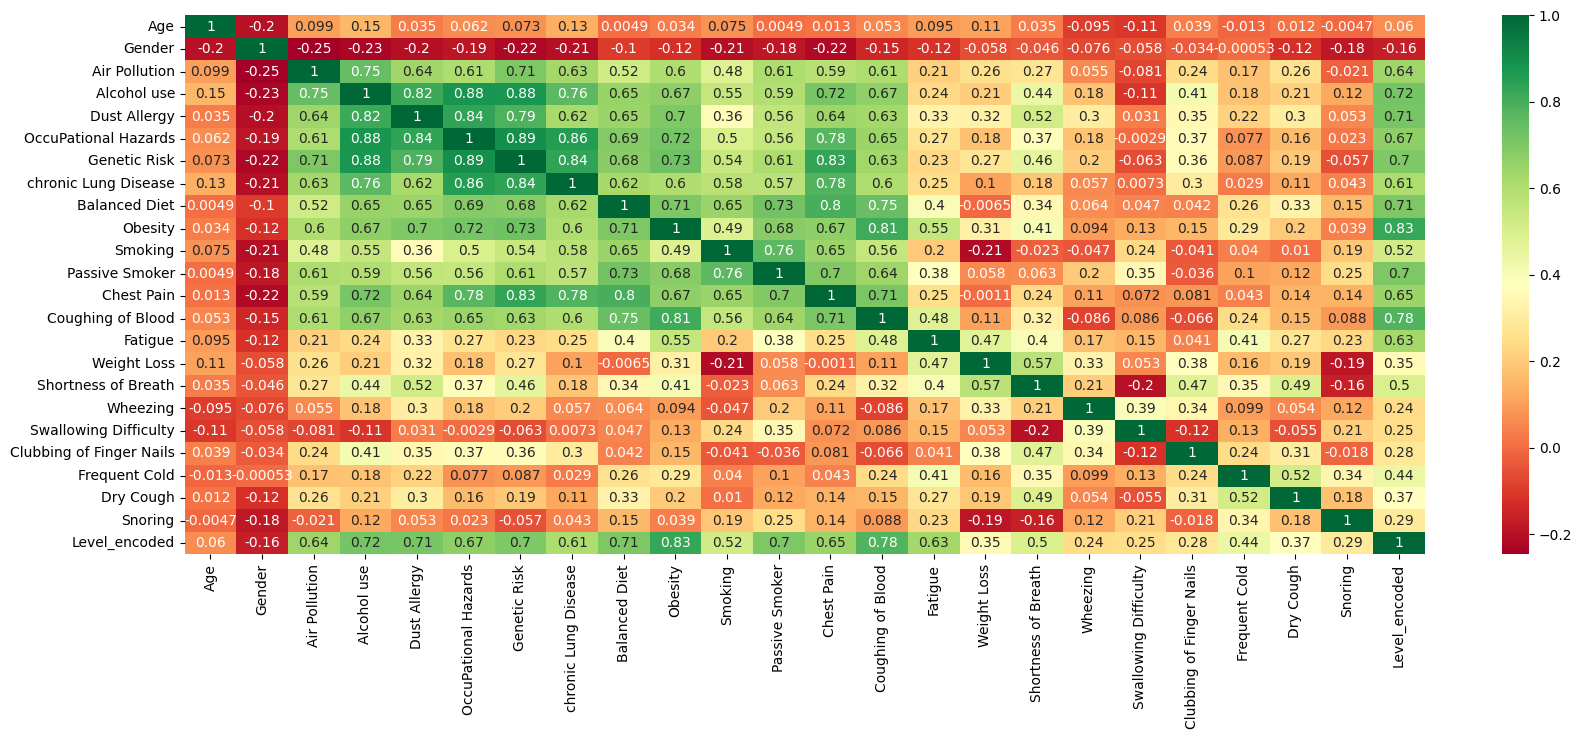

In [ ]:
plt.figure(figsize=(20,7))
sns.heatmap(data_cleaned.corr(), annot=True, cmap='RdYlGn')

Answering the question - The values between 0.1 and -.01 have no correlation between them!

Presence of Multicollinearity: The heatmap suggests that there is multicollinearity among some of the predictor variables, indicated by strong correlation coefficients (either positive or negative) that are significantly different from zero. This implies that some predictors are not entirely independent of each other.

Implications for Modeling: The lack of complete independence among predictor variables can affect the reliability and interpretability of a multivariate model's coefficients. It may necessitate the use of dimensionality reduction techniques or regularization to appropriately model the dependent variable.

'Coughing of Blood' and 'Chest Pain' have a high positive correlation

There appears to be a range of positive and negative correlations between the different features and the 'Level_encoded' target variable.

Several features, such as 'Genetic Risk', 'Passive Smoker', 'Chest Pain', 'Coughing of Blood', etc., show a relatively strong positive correlation with 'Level_encoded'. This suggests that higher values of these features are associated with higher levels of cancer risk

Some features show little to no correlation with 'Level_encoded', indicated by correlation coefficients close to 0.

The correlation between 'Level_encoded' and 'Age' is very low suggesting that age might not be a strong standalone predictor for the cancer risk level in this dataset

In [ ]:
#Using OLS for finding the p value to check the significant features
import statsmodels.api as sm


data_cleaned['Level'] = data_cleaned['Level'].replace('Low', 0)
data_cleaned['Level'] = data_cleaned['Level'].replace('Medium', 1)
data_cleaned['Level'] = data_cleaned['Level'].replace('High', 2)

data_cleaned['Level'] = data_cleaned['Level'].astype(float)
data_cleaned[['Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring']] = data_cleaned[['Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring']].astype(float)

model = sm.OLS(data_cleaned['Level'], data_cleaned[['Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring']]).fit()

# Print out the statistics
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Level   R-squared (uncentered):                   0.949
Model:                            OLS   Adj. R-squared (uncentered):              0.948
Method:                 Least Squares   F-statistic:                              792.4
Date:                Wed, 03 Apr 2024   Prob (F-statistic):                        0.00
Time:                        00:47:42   Log-Likelihood:                         -221.44
No. Observations:                1000   AIC:                                      488.9
Df Residuals:                     977   BIC:                                      601.8
Df Model:                          23                                                  
Covariance Type:            nonrobust                                                  
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Age                         -0.0095      0.001    -12.889      0.000      -0.011      -0.008
Gender                      -0.2003      0.017    -11.455      0.000      -0.235      -0.166
Air Pollution                0.0058      0.010      0.603      0.546      -0.013       0.025
Alcohol use                  0.1522      0.013     11.335      0.000       0.126       0.179
Dust Allergy                -0.0335      0.012     -2.700      0.007      -0.058      -0.009
OccuPational Hazards        -0.1605      0.020     -7.853      0.000      -0.201      -0.120
Genetic Risk                 0.1277      0.020      6.289      0.000       0.088       0.168
chronic Lung Disease         0.0134      0.015      0.864      0.388      -0.017       0.044
Balanced Diet                0.0573      0.012      4.767      0.000       0.034       0.081
Obesity                      0.0867      0.013      6.809      0.000       0.062       0.112
Smoking                     -0.0621      0.008     -7.485      0.000      -0.078      -0.046
Passive Smoker               0.0356      0.012      3.036      0.002       0.013       0.059
Chest Pain                  -0.0652      0.012     -5.321      0.000      -0.089      -0.041
Coughing of Blood            0.0588      0.011      5.315      0.000       0.037       0.081
Fatigue                      0.1000      0.008     12.183      0.000       0.084       0.116
Weight Loss                 -0.0419      0.008     -4.971      0.000      -0.058      -0.025
Shortness of Breath          0.0269      0.009      2.926      0.004       0.009       0.045
Wheezing                    -0.0369      0.007     -5.029      0.000      -0.051      -0.022
Swallowing Difficulty        0.0898      0.008     11.775      0.000       0.075       0.105
Clubbing of Finger Nails     0.0415      0.007      6.010      0.000       0.028       0.055
Frequent Cold               -0.0134      0.008     -1.608      0.108      -0.030       0.003
Dry Cough                    0.0035      0.007      0.489      0.625      -0.010       0.017
Snoring                      0.0346      0.009      3.960      0.000       0.017       0.052
==============================================================================
Omnibus:                       33.282   Durbin-Watson:                   1.334
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.872
Skew:                          -0.441   Prob(JB):                     1.62e-08
Kurtosis:                       3.289   Cond. No.                         123.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a

From the regression results, here are some observations:

Age: With a p-value of 0.000, Age is highly significant, but since the coefficient is negative, it suggests that higher age is associated with a lower 'Level'.

Gender: Also highly significant with a p-value of 0.000, and with a negative coefficient, indicating that the variable 'Gender' is inversely related to 'Level'.

Alcohol use: Has a p-value of 0.000 and a positive coefficient, suggesting a significant and positive relationship with 'Level'.

Dust Allergy, Occupational Hazards, Genetic Risk, Balanced Diet, Obesity, Smoking, Passive Smoker, Chest Pain, Coughing of Blood, Fatigue, Weight Loss, Shortness of Breath, Wheezing, Swallowing Difficulty, Clubbing of Finger Nails, Snoring: All these variables have p-values less than 0.05, indicating they are significant predictors of 'Level'.

Chronic Lung Disease, Frequent Cold, Dry Cough: These variables have p-values greater than 0.05, suggesting they are not statistically significant predictors of 'Level' at the 5% level.

Yes, the model makes sense since the RMSE for test set is a very small value

The Variance Inflation Factor (VIF) is used to detect the presence of multicollinearity among the independent variables

In [ ]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Add a constant term for the intercept
X = add_constant(data_cleaned.drop('Level', axis=1))

# Create a DataFrame to hold feature names and their VIF values
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF Value"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF values
print(vif)

                     Feature   VIF Value
0                      const  132.055763
1                        Age    1.244946
2                     Gender    1.325663
3              Air Pollution    4.617973
4                Alcohol use   17.617361
5               Dust Allergy    6.549691
6       OccuPational Hazards   21.307924
7               Genetic Risk   22.854892
8       chronic Lung Disease    8.776150
9              Balanced Diet    7.230673
10                   Obesity    8.204970
11                   Smoking    4.951041
12            Passive Smoker    7.957131
13                Chest Pain    9.191125
14         Coughing of Blood   10.085873
15                   Fatigue    4.218545
16               Weight Loss    3.802270
17       Shortness of Breath    5.101777
18                  Wheezing    2.546232
19     Swallowing Difficulty    3.861817
20  Clubbing of Finger Nails    3.195849
21             Frequent Cold    2.497482
22                 Dry Cough    2.281306
23              

The presence of multicollinearity suggests that the independent variables are not completely independent from each other. It becomes difficult to determine the individual effect of one predictor on the target variable because it is so closely related to one or more of the other predictors.

Alcohol use: With a VIF of 17.61, it suggests a high level of multicollinearity with one or more other independent variables.

Occupational Hazards: Has a VIF of 21.31, which is quite high and indicates significant multicollinearity.

Genetic Risk: Also has a high VIF of 22.85, suggesting that this variable is linearly related to other variables in the dataset.

Chronic Lung Disease, Balanced Diet, Obesity, Passive Smoker, Chest Pain, Coughing of Blood: All have VIFs above 5, indicating moderate to high multicollinearity.

Level_encoded: Although this is your encoded target variable and typically wouldn't be included in the VIF calculation for predictors, a VIF of 13.82 would be considered high if it were a predictor.

**Regularization**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Define your features and target variable
X = data_cleaned.drop('Level', axis=1)  # Assuming 'Level' is your target variable
y = data_cleaned['Level']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Ridge Regression model with an alpha value
ridge_model = Ridge(alpha=1.0)  # Alpha is the regularization strength

# Fit the model on the training data
ridge_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ridge_model.predict(X_test)

# Evaluate the model
ridge_mse = mean_squared_error(y_test, y_pred)
print(f'Ridge Regression MSE: {ridge_mse}')

Ridge Regression MSE: 2.8893529932894e-05


The Mean Squared Error (MSE) is a measure of the quality of an estimator—it is always non-negative, and values closer to zero are better. An MSE of 2.8893529932894e-05 is a very small value, which suggests that the Ridge regression model's predictions are very close to the actual values and hence regularization is useful for the model

As we saw from the OLS results the top 4 variables are the most significant. Variables are significant when p-value is less than 0.05

**H2O**

In [ ]:
data_cleaned = h2o.H2OFrame(data_cleaned)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
data_cleaned

Age    Gender    Air Pollution    Alcohol use    Dust Allergy    OccuPational Hazards    Genetic Risk    chronic Lung Disease    Balanced Diet    Obesity    Smoking    Passive Smoker    Chest Pain    Coughing of Blood    Fatigue    Weight Loss    Shortness of Breath    Wheezing    Swallowing Difficulty    Clubbing of Finger Nails    Frequent Cold    Dry Cough    Snoring    Level    Level_encoded
-----  --------  ---------------  -------------  --------------  ----------------------  --------------  ----------------------  ---------------  ---------  ---------  ----------------  ------------  -------------------  ---------  -------------  ---------------------  ----------  -----------------------  --------------------------  ---------------  -----------  ---------  -------  ---------------
   33         1                2              4               5                       4               3                       2                2          4          3                 2             2                    4          3              4                      2           2                        3                           1                2            3          4        0                0
   17         1                3              1               5                       3               4                       2                2          2          2                 4             2                    3          1              3                      7           8                        6                           2                1            7          2        1                1
   35         1                4              5               6                       5               5                       4                6          7          2                 3             4                    8          8              7                      9           2                        1                           4                6            7          2        2                2
   37         1                7              7               7                       7               6                       7                7          7          7                 7             7                    8          4              2                      3           1                        4                           5                6            7          5        2                2
   46         1                6              8               7                       7               7                       6                7          7          8                 7             7                    9          3              2                      4           1                        4                           2                4            2          3        2                2
   35         1                4              5               6                       5               5                       4                6          7          2                 3             4                    8          8              7                      9           2                        1                           4                6            7          2        2                2
   52         2                2              4               5                       4               3                       2                2          4          3                 2             2                    4          3              4                      2           2                        3                           1                2            3          4        0                0
   28         2                3              1               4                       3               2                       3                4          3          1                 4             3                    1          3              2                      2           4                        2                           2                3            4          3        0          

In [ ]:
train, test = data_cleaned.split_frame(seed = 1234, destination_frames = ["train.hex", "test.hex"])

In [ ]:
# check the number of train set and test set
train["is_train"] = 1
test["is_train"] = 0

drift_data_cleaned = train.rbind(test)
drift_data_cleaned["is_train"] = drift_data_cleaned["is_train"].asfactor()

In [ ]:
drift_data_cleaned["is_train"].table()

is_train    Count
----------  -------
         0      247
         1      753
[2 rows x 2 columns]

**Start to train in 10 models by AutoML**

In [ ]:
x = list(set(train.col_names) - set(["Level","Level_encoded"]))

In [ ]:
from h2o.automl import H2OAutoML
# Run AutoML for 10 base models (limited to 1 hour max runtime by default)
aml = H2OAutoML(max_models=10, seed=1234, sort_metric="MAE", project_name = "random_split")
aml.train(x=x, y="Level_encoded", training_frame=train)

AutoML progress: |
00:47:54.508: _train param, Dropping bad and constant columns: [is_train]

██
00:48:32.480: _train param, Dropping bad and constant columns: [is_train]


00:48:34.140: _train param, Dropping bad and constant columns: [is_train]

███
00:49:13.471: _train param, Dropping bad and constant columns: [is_train]

██
00:49:37.258: _train param, Dropping bad and constant columns: [is_train]
00:49:39.308: _train param, Dropping bad and constant columns: [is_train]

███
00:49:49.606: _train param, Dropping bad and constant columns: [is_train]

██
00:50:00.532: _train param, Dropping bad and constant columns: [is_train]

█
00:50:13.155: _train param, Dropping bad and constant columns: [is_train]

█
00:50:21.220: _train param, Dropping bad and constant columns: [is_train]


00:50:23.175: _train param, Dropping unused columns: [is_train]


00:50:25.502: _train param, Dropping unused columns: [is_train]

█████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_3_AutoML_1_20240403_04754


Model Summary: 
    number_of_trees
--  -----------------
    72

ModelMetricsRegression: xgboost
** Reported on train data. **

MSE: 8.053001062534861e-08
RMSE: 0.0002837781010320363
MAE: 0.00011518150173121042
RMSLE: 0.00025774347091099927
Mean Residual Deviance: 8.053001062534861e-08

ModelMetricsRegression: xgboost
** Reported on cross-validation data. **

MSE: 3.9918831811739015e-06
RMSE: 0.001997969764829764
MAE: 0.0003208195821966844
RMSLE: 0.0018064823780363129
Mean Residual Deviance: 3.9918831811739015e-06

Cross-Validation Metrics Summary: 
                        mean         sd           cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  -----------  -----------  ------------  ------------  ------------  ------------  ------------
aic                     nan          0            nan           nan           nan           nan           nan
loglikelihood           nan          0            nan           nan           nan           nan           nan
mae                     0.00032066   0.000131014  0.000492169   0.000183517   0.000406656   0.000314314   0.000206642
mean_residual_deviance  3.98276e-06  6.67119e-06  1.57376e-05   1.11224e-07   2.96653e-06   8.96592e-07   2.01819e-07
mse                     3.98276e-06  6.67119e-06  1.57376e-05   1.11224e-07   2.96653e-06   8.96592e-07   2.01819e-07
r2                      0.999994     1.05224e-05  0.999975      1             0.999996      0.999999      1
residual_deviance       3.98276e-06  6.67119e-06  1.57376e-05   1.11224e-07   2.96653e-06   8.96592e-07   2.01819e-07
rmse                    0.00148381   0.00149209   0.00396707    0.000333503   0.00172236    0.000946886   0.000449243
rmsle                   0.00118203   0.00152402   0.00386653    0.000272653   0.000907433   0.000598832   0.000264711

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------
    2024-04-03 00:50:20  7.484 sec   0                  1.00083          0.87583         1.00166
    2024-04-03 00:50:20  7.628 sec   5                  0.174428         0.152049        0.030425
    2024-04-03 00:50:20  7.653 sec   10                 0.0309893        0.0266154       0.000960339
    2024-04-03 00:50:20  7.681 sec   15                 0.00589938       0.0048042       3.48027e-05
    2024-04-03 00:50:20  7.706 sec   20                 0.00123647       0.000899477     1.52886e-06
    2024-04-03 00:50:20  7.732 sec   25                 0.000400902      0.00023244      1.60722e-07
    2024-04-03 00:50:20  7.774 sec   30                 0.000307848      0.000125367     9.47705e-08
    2024-04-03 00:50:20  7.798 sec   35                 0.000284923      0.000114447     8.11813e-08
    2024-04-03 00:50:20  7.822 sec   40                 0.000284876      0.000114083     8.11544e-08
    2024-04-03 00:50:21  7.847 sec   45                 0.000284853      0.000113693     8.11411e-08
    2024-04-03 00:50:21  7.879 sec   50                 0.000284862      0.000113791     8.11465e-08
    2024-04-03 00:50:21  7.910 sec   55                 0.000284869      0.00011358      8.11503e-08
    2024-04-03 00:50:21  7.933 sec   60                 0.00028487       0.000113599     8.1151e-08
    2024-04-03 00:50:21  7.959 sec   65                 0.000284868      0.00011381      8.11495e-08
    2024-04-03 00:50:21  8.005 sec   70                 0.00028487       0.000113622     8.11509e-08
    2024-04-03 00:50:21  8.029 sec   72                 0.000283778      0.000115182     8.053e-08

Variable Importances: 
variable              relative_importance     scaled_importance       percentage
--------------------  ----------------------  ----------------------  ----------------------
Obesity               393.2

In [ ]:
# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head()

model_id                                                        mae        rmse          mse       rmsle    mean_residual_deviance
------------------------------------------------------  -----------  ----------  -----------  ----------  ------------------------
XGBoost_3_AutoML_1_20240403_04754                       0.00032082   0.00199797  3.99188e-06  0.00180648               3.99188e-06
GBM_4_AutoML_1_20240403_04754                           0.000368179  0.00182751  3.33979e-06  0.00161753               3.33979e-06
GBM_2_AutoML_1_20240403_04754                           0.000533136  0.00236955  5.61475e-06  0.0016339                5.61475e-06
GBM_3_AutoML_1_20240403_04754                           0.000757122  0.00351234  1.23365e-05  0.00253233               1.23365e-05
XGBoost_2_AutoML_1_20240403_04754                       0.000904045  0.00623809  3.89137e-05  0.00402514               3.89137e-05
StackedEnsemble_BestOfFamily_1_AutoML_1_20240403_04754  0.00116139   0.00341512  1.1663e-05   0.00202585               1.1663e-05
DRF_1_AutoML_1_20240403_04754                           0.00121588   0.00982968  9.66226e-05  0.00528303               9.66226e-05
XGBoost_1_AutoML_1_20240403_04754                       0.00136889   0.00735829  5.41444e-05  0.00741645               5.41444e-05
StackedEnsemble_AllModels_1_AutoML_1_20240403_04754     0.00142455   0.00361864  1.30946e-05  0.00298606               1.30946e-05
GBM_1_AutoML_1_20240403_04754                           0.0120329    0.0266267   0.000708982  0.0248768                0.000708982
[10 rows x 6 columns]

In [ ]:
best_model = aml.leader
best_model.model_performance(test)

ModelMetricsRegression: xgboost
** Reported on test data. **

MSE: 5.609046672081956e-07
RMSE: 0.0007489356896344275
MAE: 0.00016448645155483414
RMSLE: 0.00040748115113715017
Mean Residual Deviance: 5.609046672081956e-07

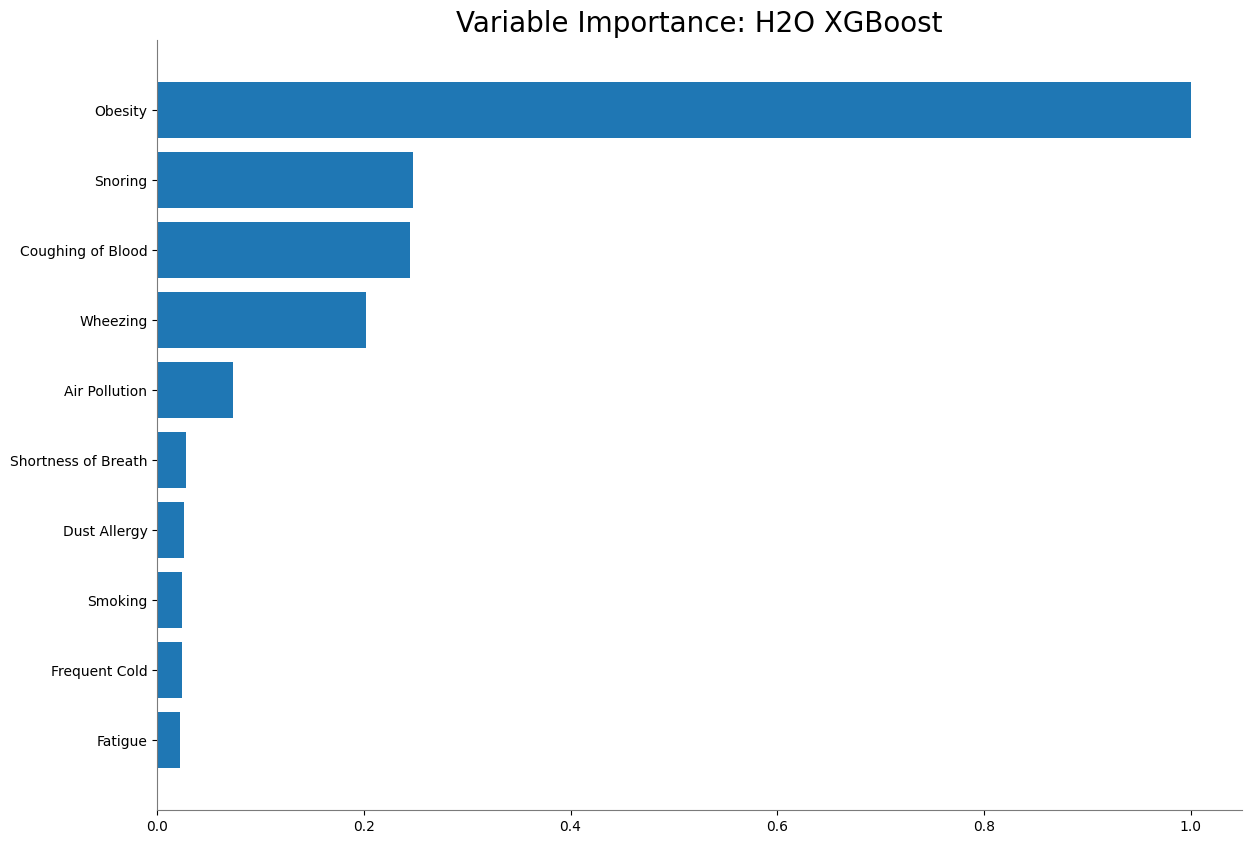

<Figure size 640x480 with 0 Axes>

In [ ]:
%matplotlib inline
best_model.varimp_plot()

**In the multivariate model the most significant predictor variable is **Obesity bold text bold text

Checking whether there is an H2O instance running at http://localhost:54321. connected.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         3 mins 06 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.46.0.1
H2O_cluster_version_age:    20 days
H2O_cluster_name:           H2O_from_python_unknownUser_uqwtfc
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.159 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                       rmse          mse          mae        rmsle    mean_residual_deviance    training_time_ms    predict_time_per_row_ms  algo
------------------------------------------------------  -----------  -----------  -----------  -----------  ------------------------  ------------------  -------------------------  ---------------
DRF_1_AutoML_2_20240403_05036                           0            0            0            0                         0                           180                   0.009492  DRF
GBM_5_AutoML_2_20240403_05036                           7.48334e-07  5.60003e-13  6.5643e-07   4.02257e-07               5.60003e-13                 438                   0.027284  GBM
GBM_grid_1_AutoML_2_20240403_05036_model_2              9.56343e-07  9.14593e-13  8.1531e-07   4.43008e-07               9.14593e-13                 530                   0.03193   GBM
XGBoost_grid_1_AutoML_2_20240403_05036_model_3          3.3878e-05   1.14772e-09  2.81346e-05  2.50949e-05               1.14772e-09                5706                   0.001399  XGBoost
GBM_4_AutoML_2_20240403_05036                           8.33827e-05  6.95267e-09  1.88823e-05  6.1275e-05                6.95267e-09                2151                   0.071076  GBM
XGBoost_3_AutoML_2_20240403_05036                       0.000235857  5.56285e-08  7.77124e-05  0.000227043               5.56285e-08                2897                   0.002971  XGBoost
GBM_3_AutoML_2_20240403_05036                           0.000325936  1.06234e-07  6.07392e-05  0.000163065               1.06234e-07                 865                   0.068001  GBM
XGBoost_1_AutoML_2_20240403_05036                       0.000403913  1.63146e-07  0.00019644   0.000213228               1.63146e-07                2613                   0.006288  XGBoost
GBM_2_AutoML_2_20240403_05036                           0.000411333  1.69195e-07  7.7567e-05   0.000205751               1.69195e-07                 987                   0.054394  GBM
GLM_1_AutoML_2_20240403_05036                           0.000575494  3.31193e-07  0.000406641  0.000432607               3.31193e-07                  43                   0.001128  GLM
GBM_1_AutoML_2_20240403_05036                           0.000962555  9.26513e-07  0.000393738  0.000876791               9.26513e-07                3991                   0.163308  GBM
XGBoost_grid_1_AutoML_2_20240403_05036_model_2          0.00153596   2.35919e-06  0.000341317  0.0011239                 2.35919e-06                3694                   0.004489  XGBoost
GBM_grid_1_AutoML_2_20240403_05036_model_1              0.00196896   3.87681e-06  0.000587003  0.00143716                3.87681e-06                 984                   0.086623  GBM
StackedEnsemble_AllModels_1_AutoML_2_20240403_05036     0.00228646   5.2279e-06   0.00184045   0.00150626                5.2279e-06                 2532                   0.478107  StackedEnsemble
XGBoost_2_AutoML_2_20240403_05036                       0.00256609   6.5848e-06   0.000275666  0.000891998               6.5848e-06                 3891                   0.003043  XGBoost
StackedEnsemble_BestOfFamily_1_AutoML_2_20240403_05036  0.00370456   1.37237e-05  0.00287483   0.00259651                1.37237e-05                1234                   0.062631  StackedEnsemble
XGBoost_grid_1_AutoML_2_20240403_05036_model_1          0.0132298    0.000175028  0.0041662    0.00876404                0.000175028                2864                   0.003029  XGBoost
DeepLearning_grid_1_AutoML_2_20240403_05036_model_1     0.0273803    0.000749683  0.0214753    0.0236544                 0.000749683               52279                   0.009434  DeepLearning
DeepLearning_1_AutoML_2_20240403_05036                  0.0553203    0.00306034   0.046425     0.0349851                 0.00306034                  209                   0.003243  DeepLearning
DeepLearning_grid_2_AutoML_2_2024040

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

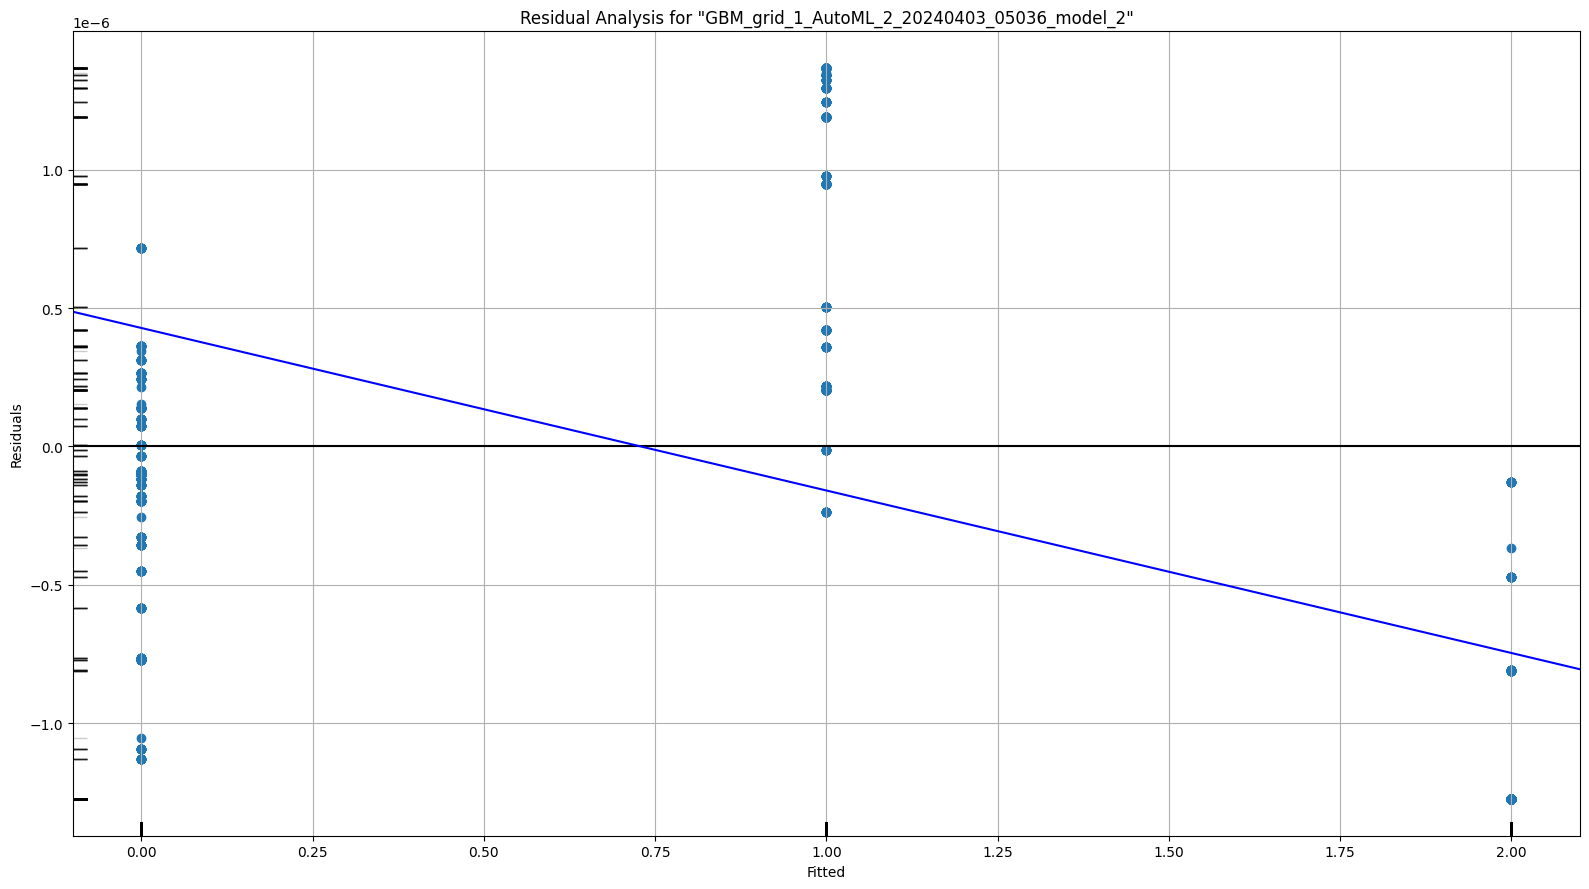

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

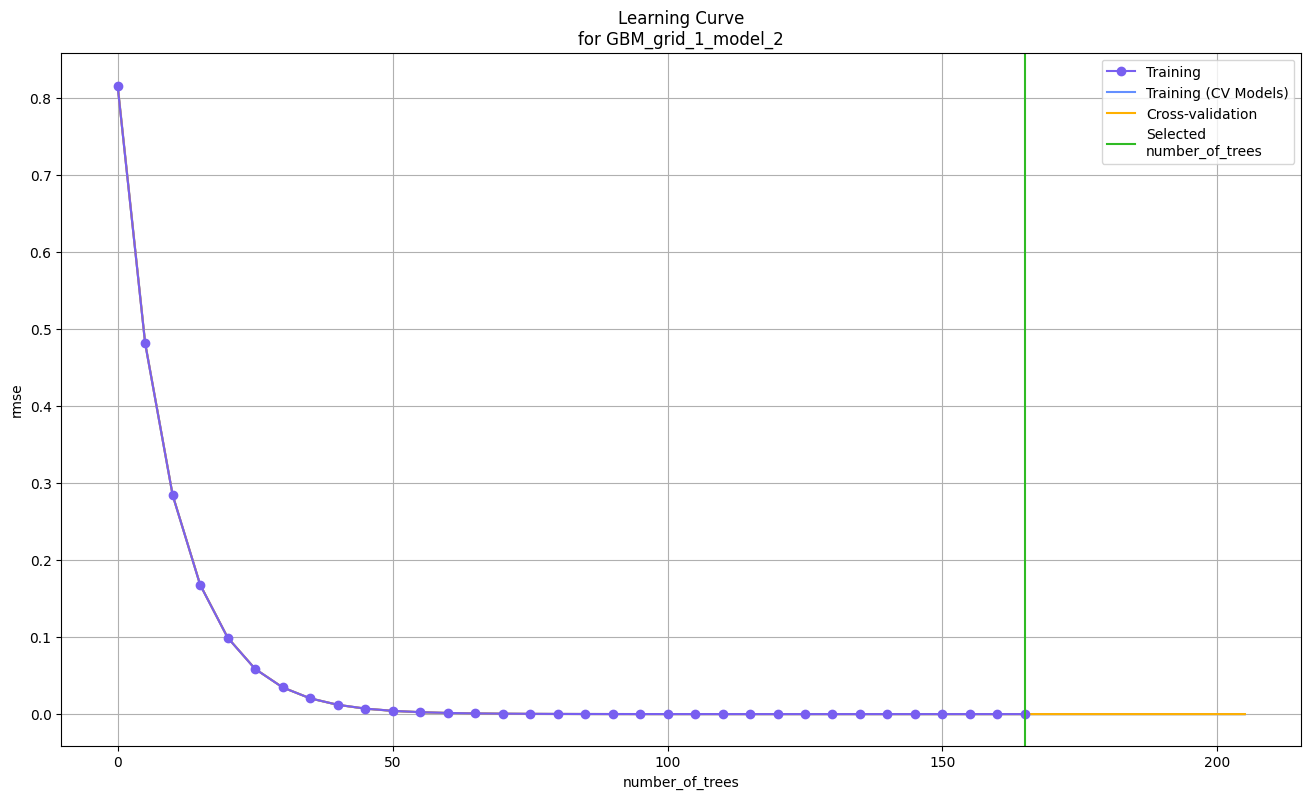

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

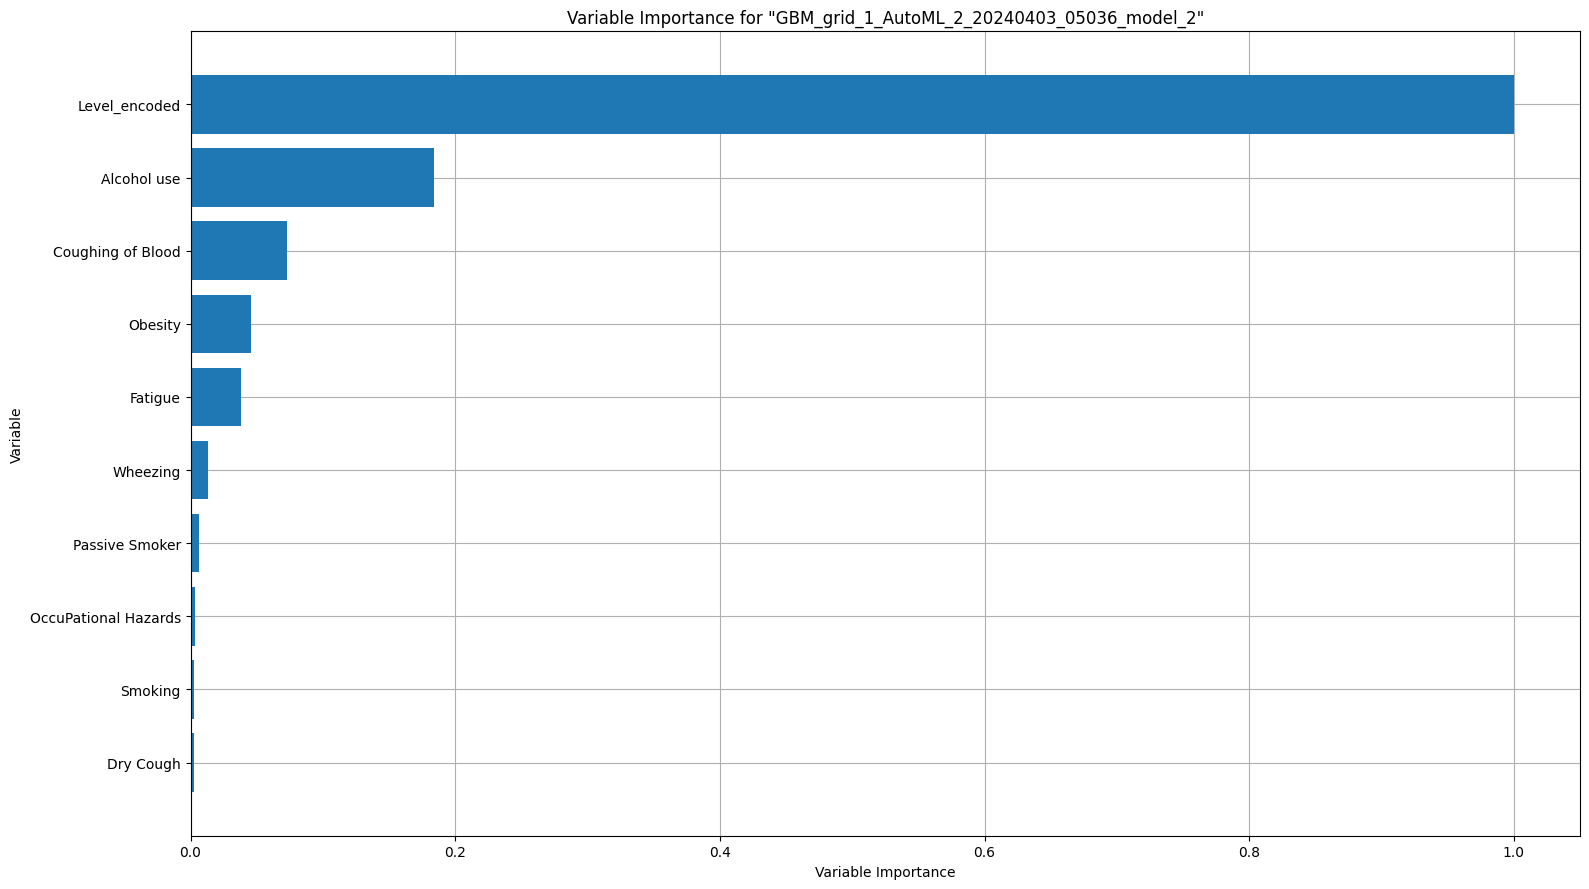

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

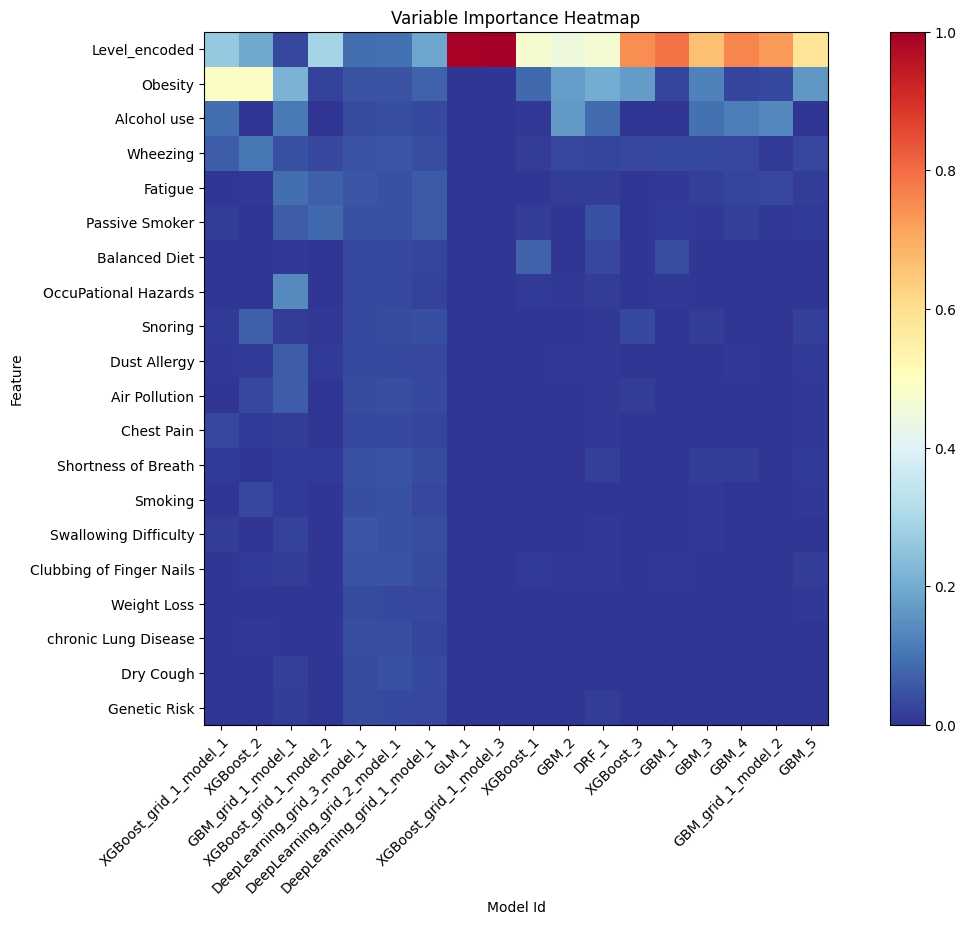

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

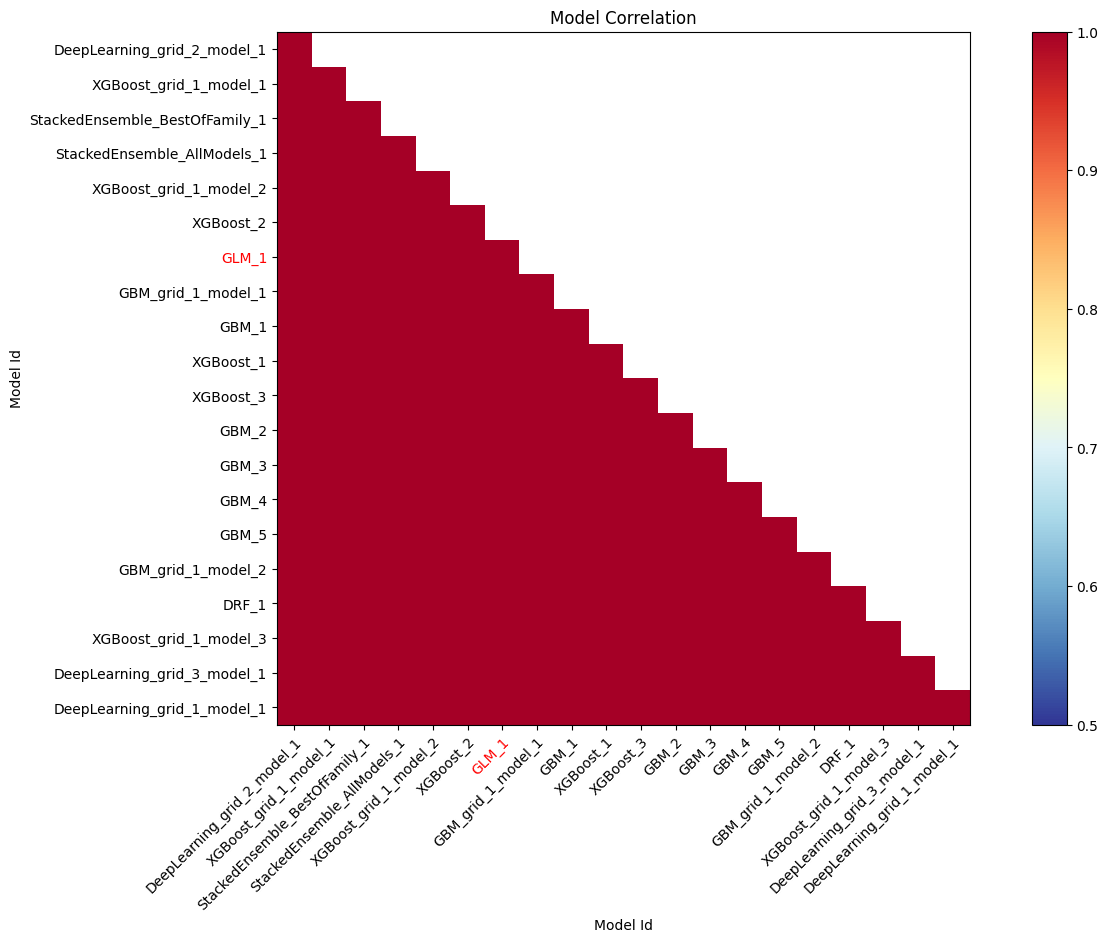

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

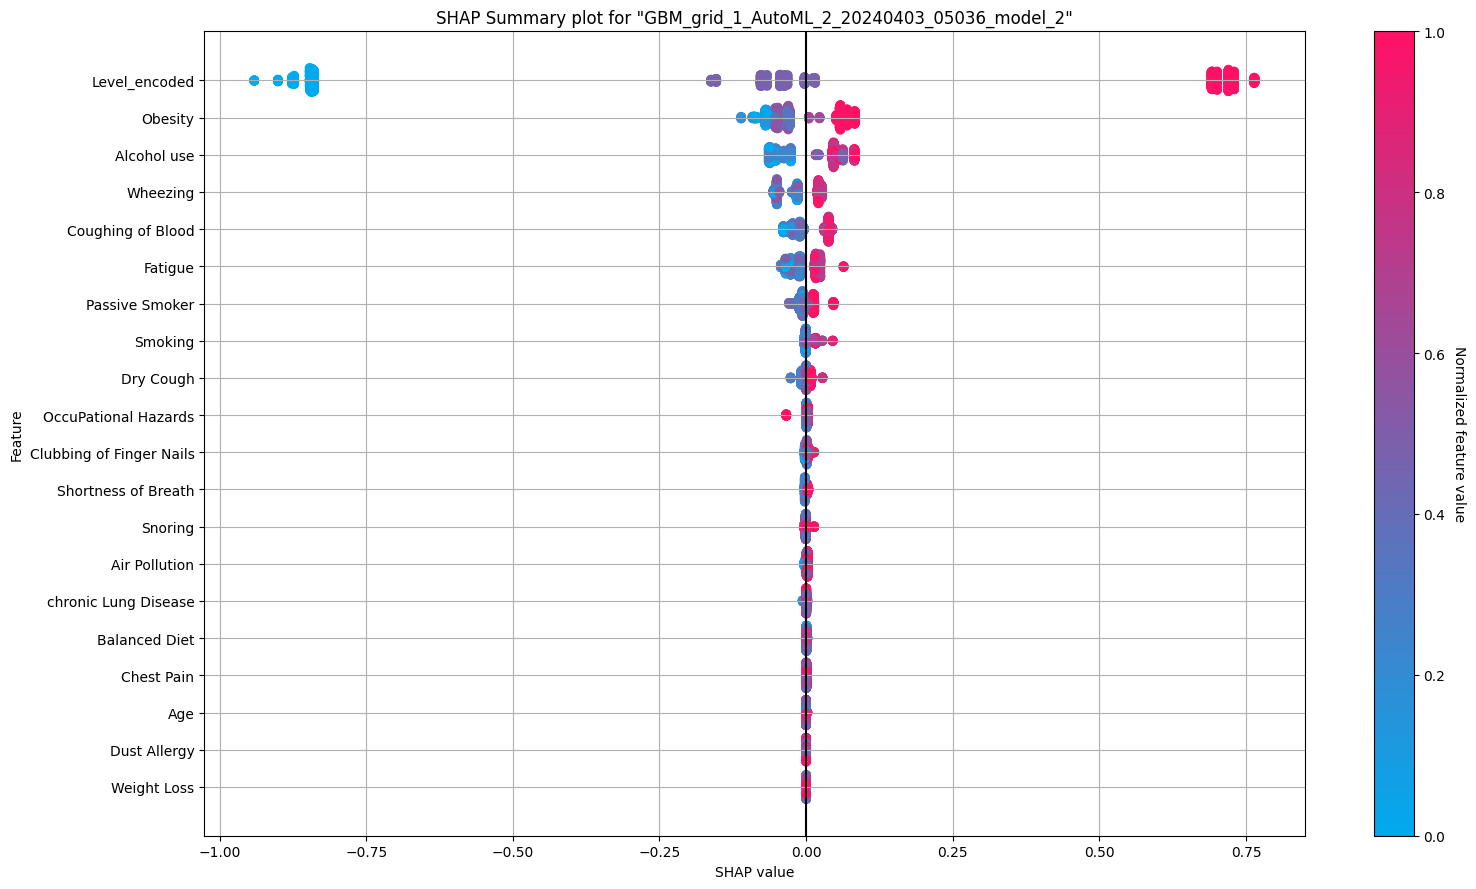

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

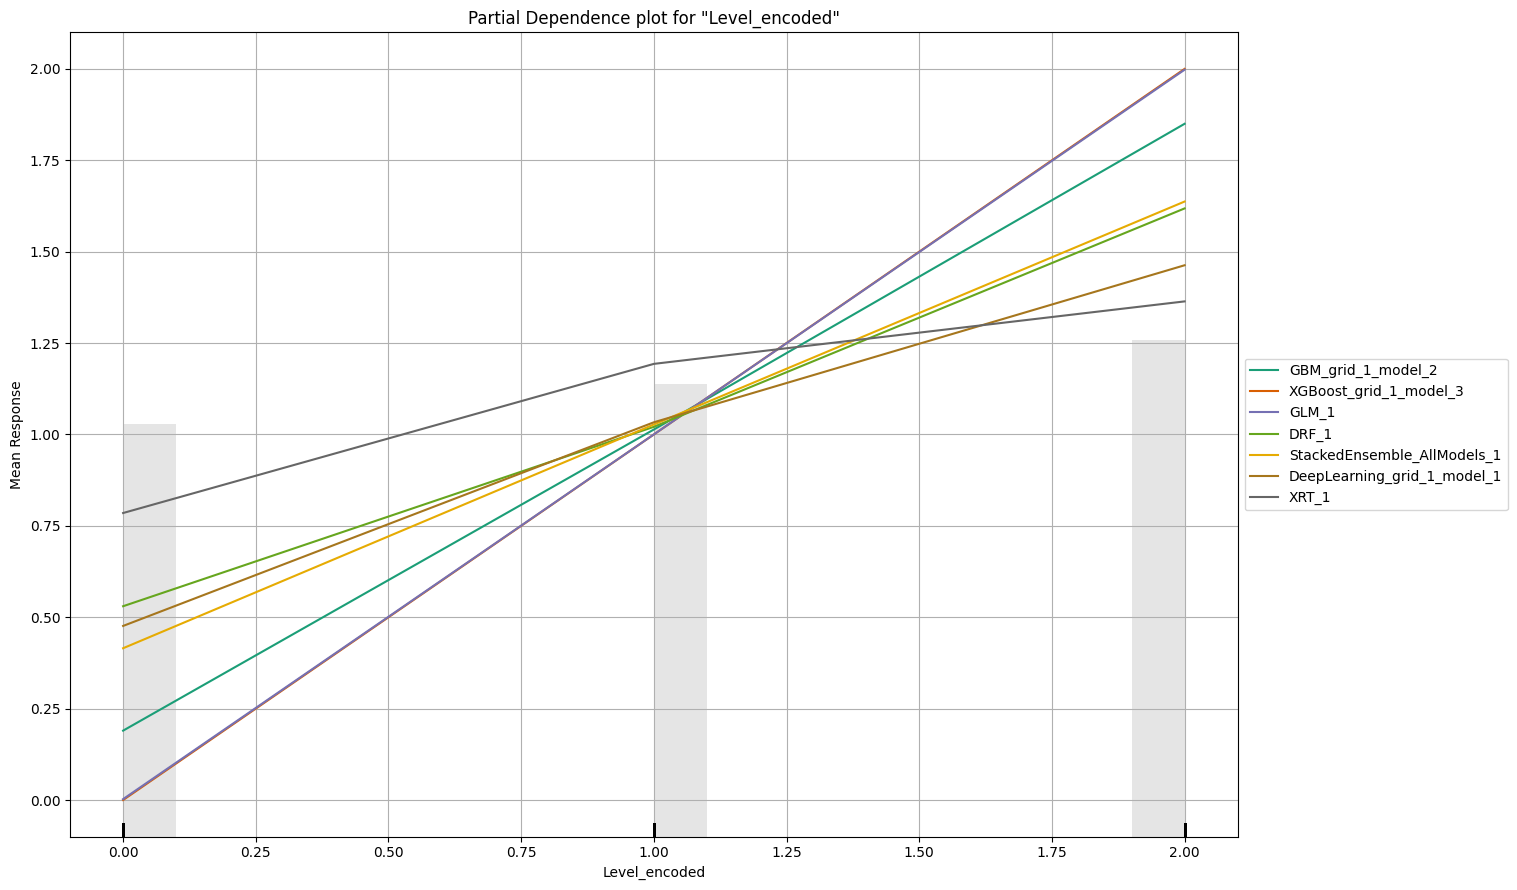

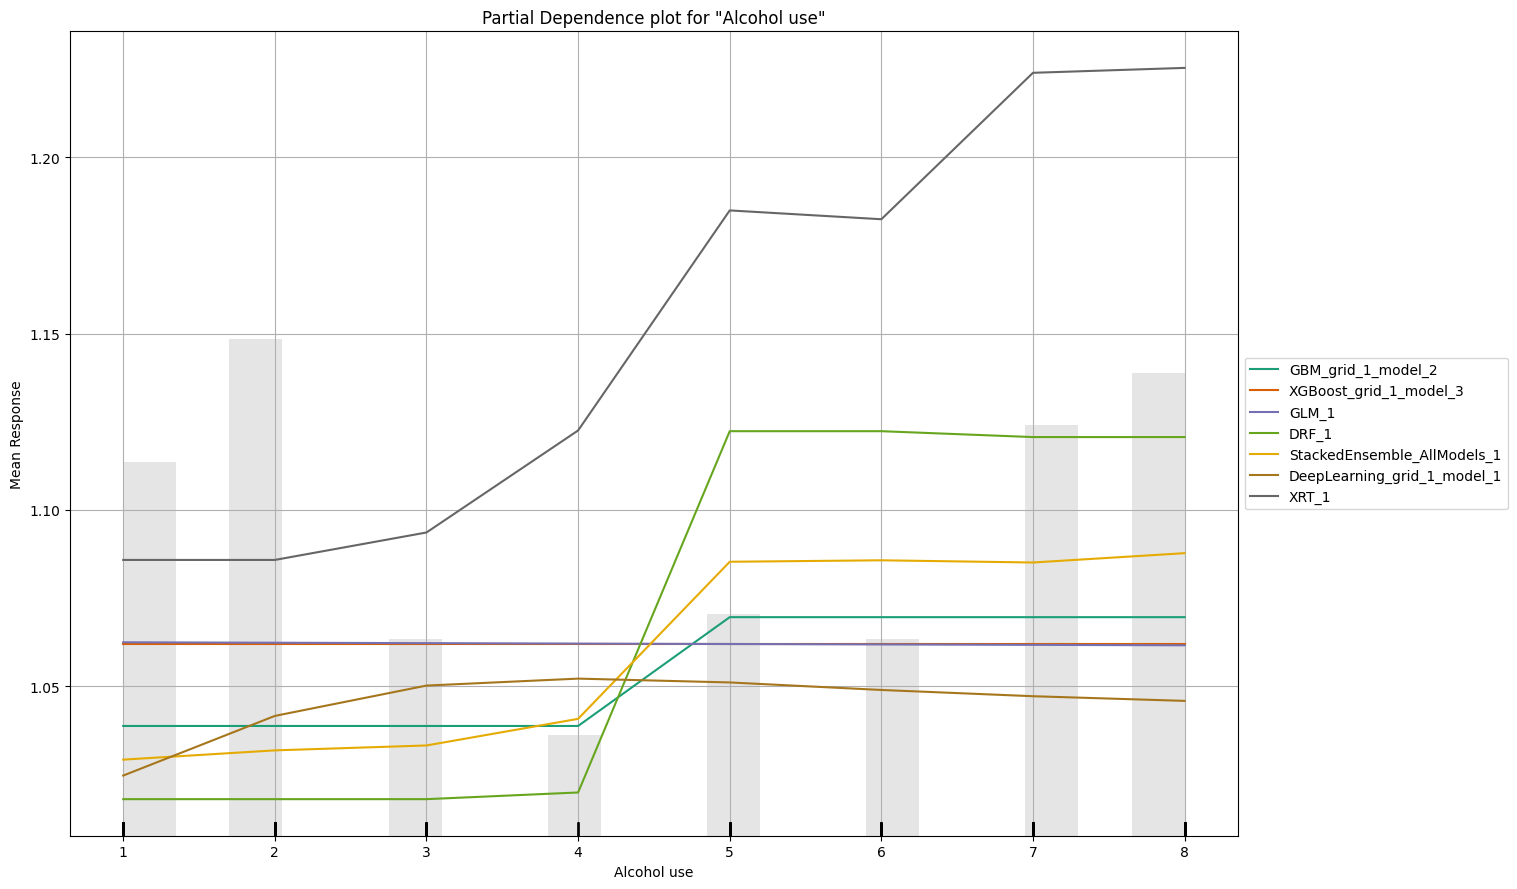

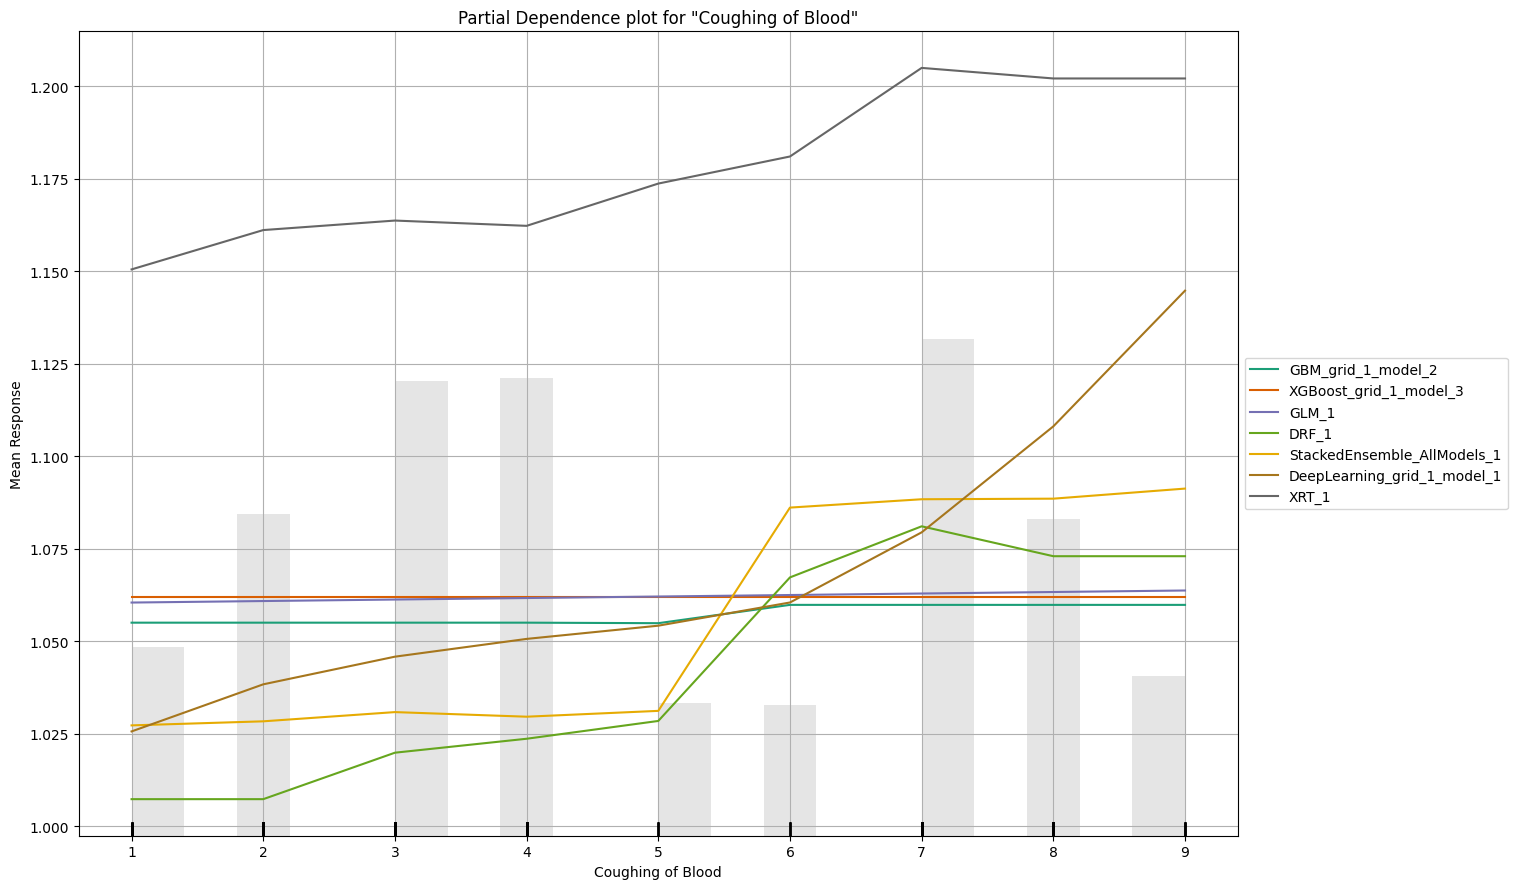

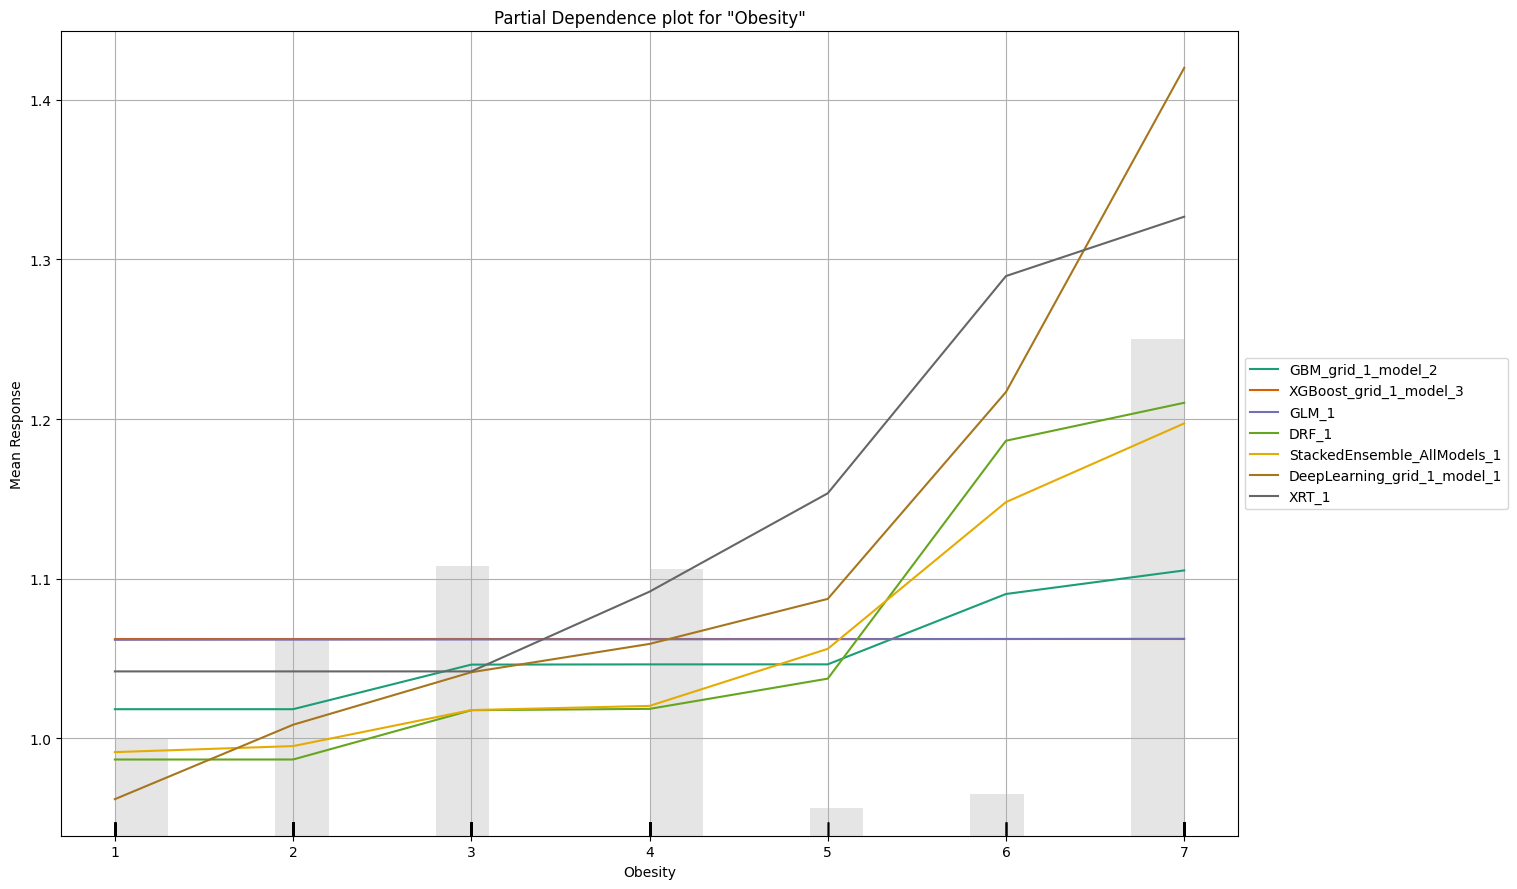

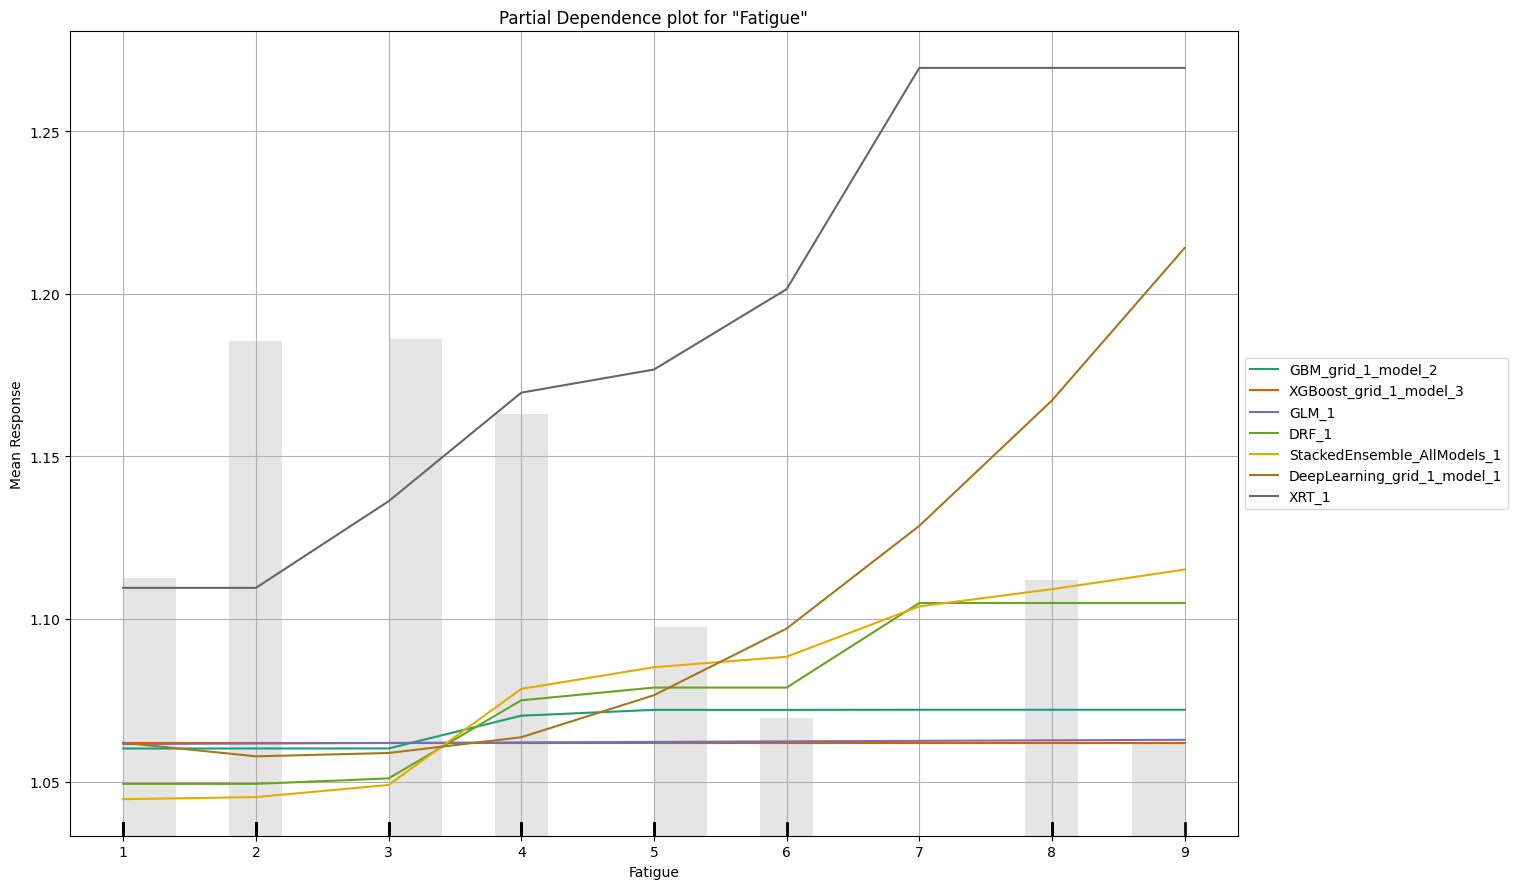

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

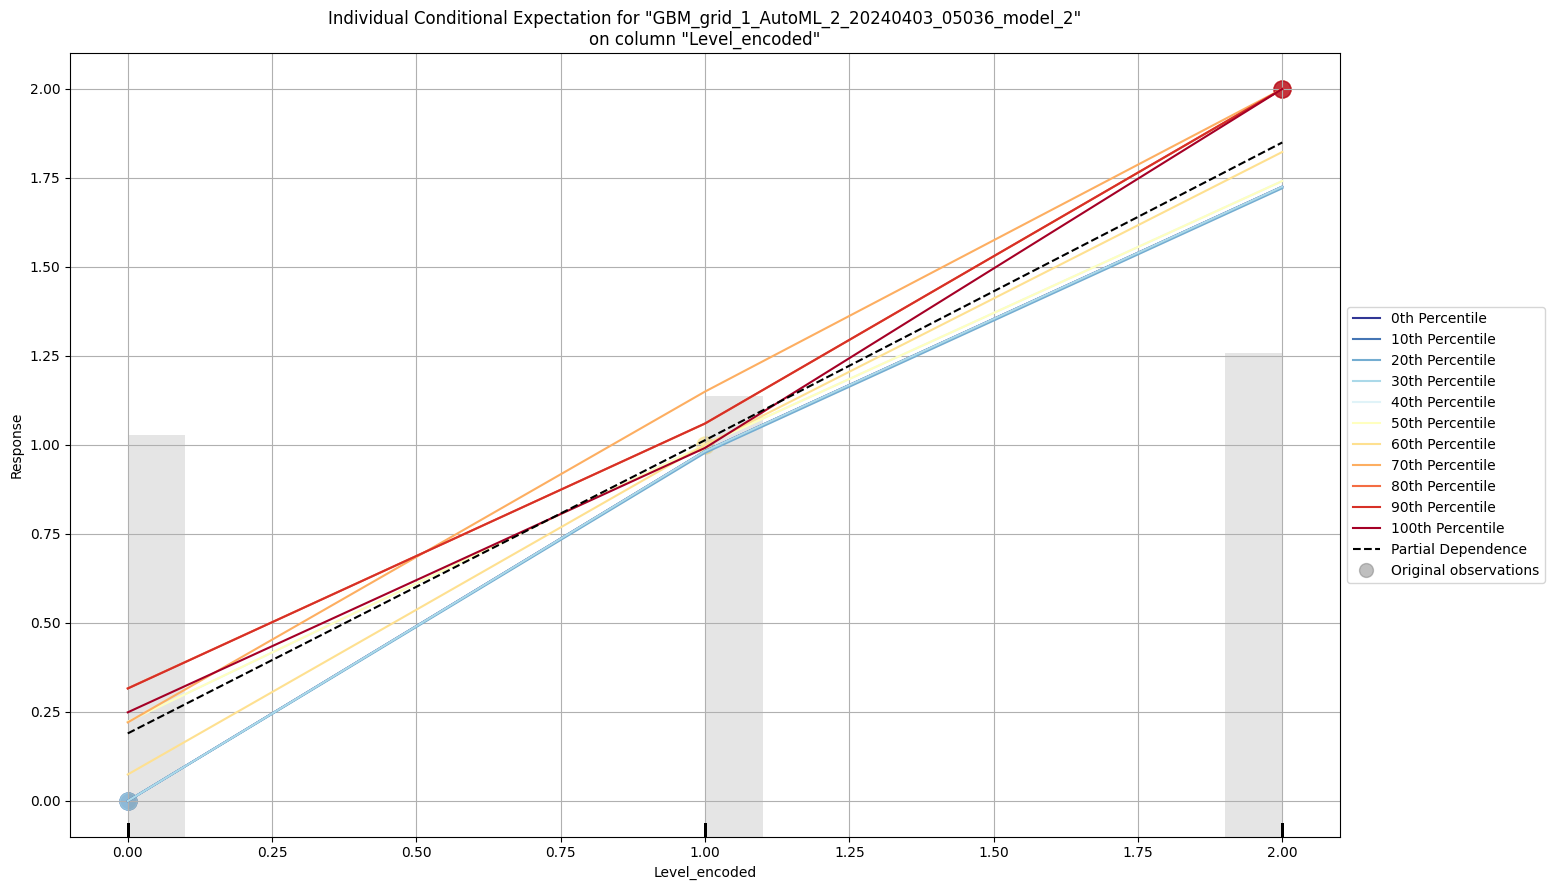

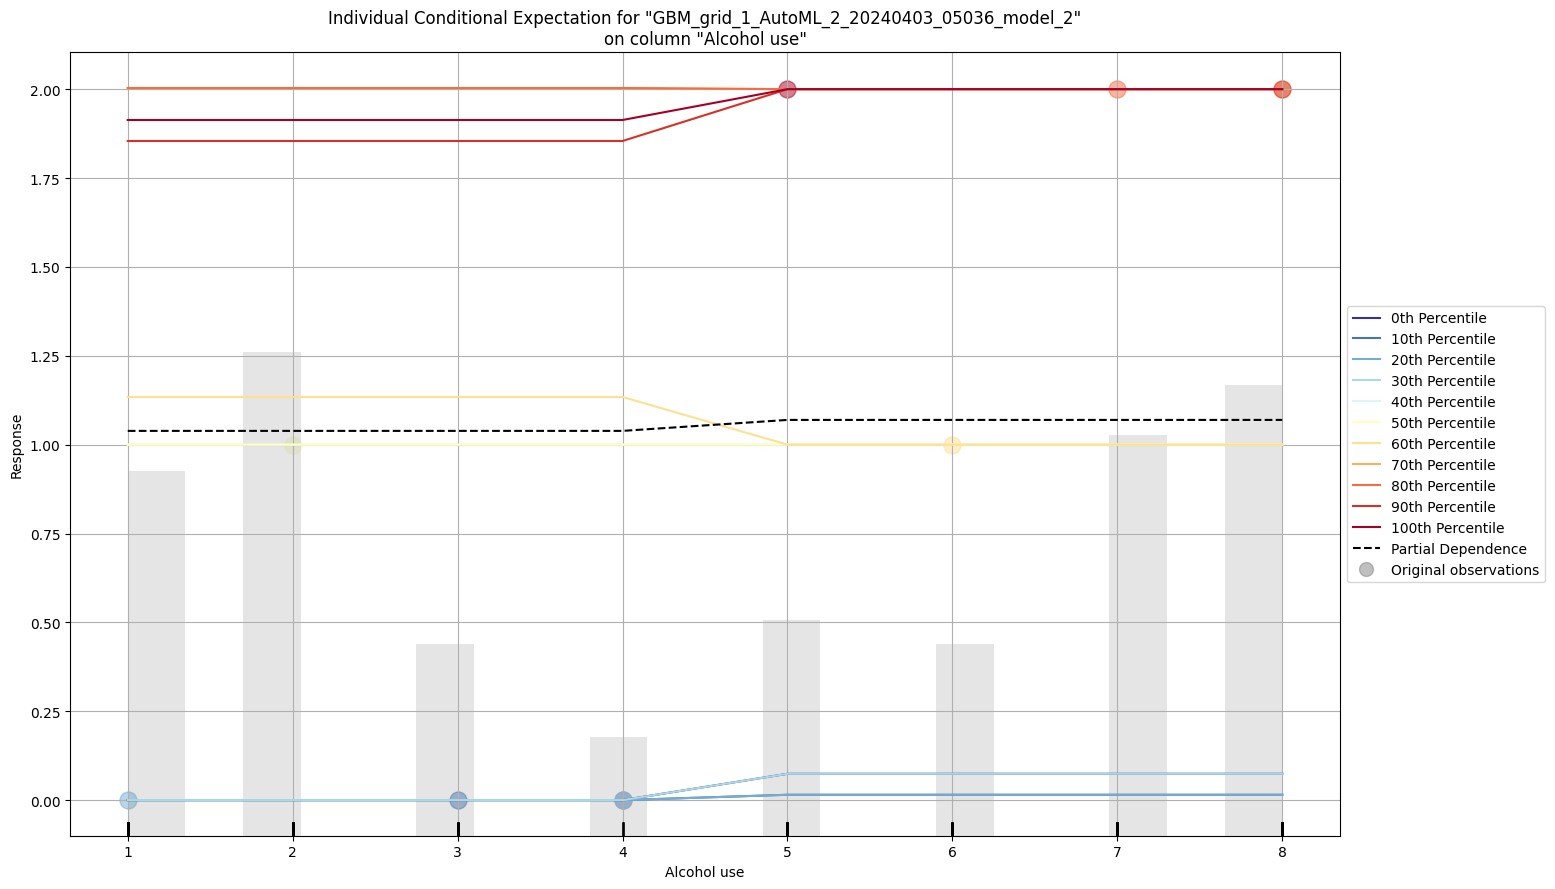

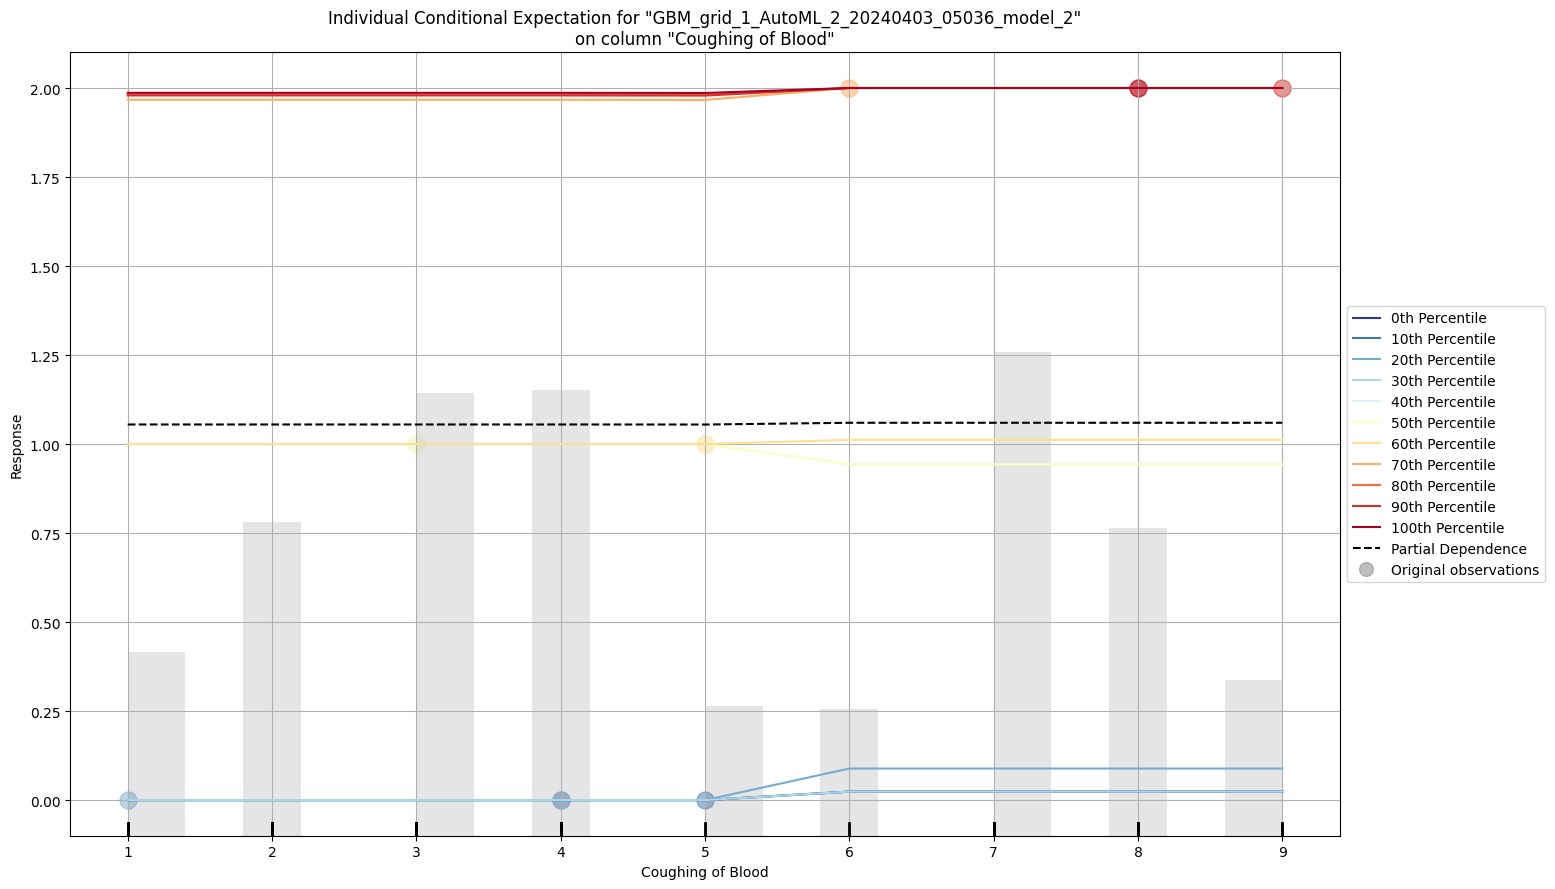

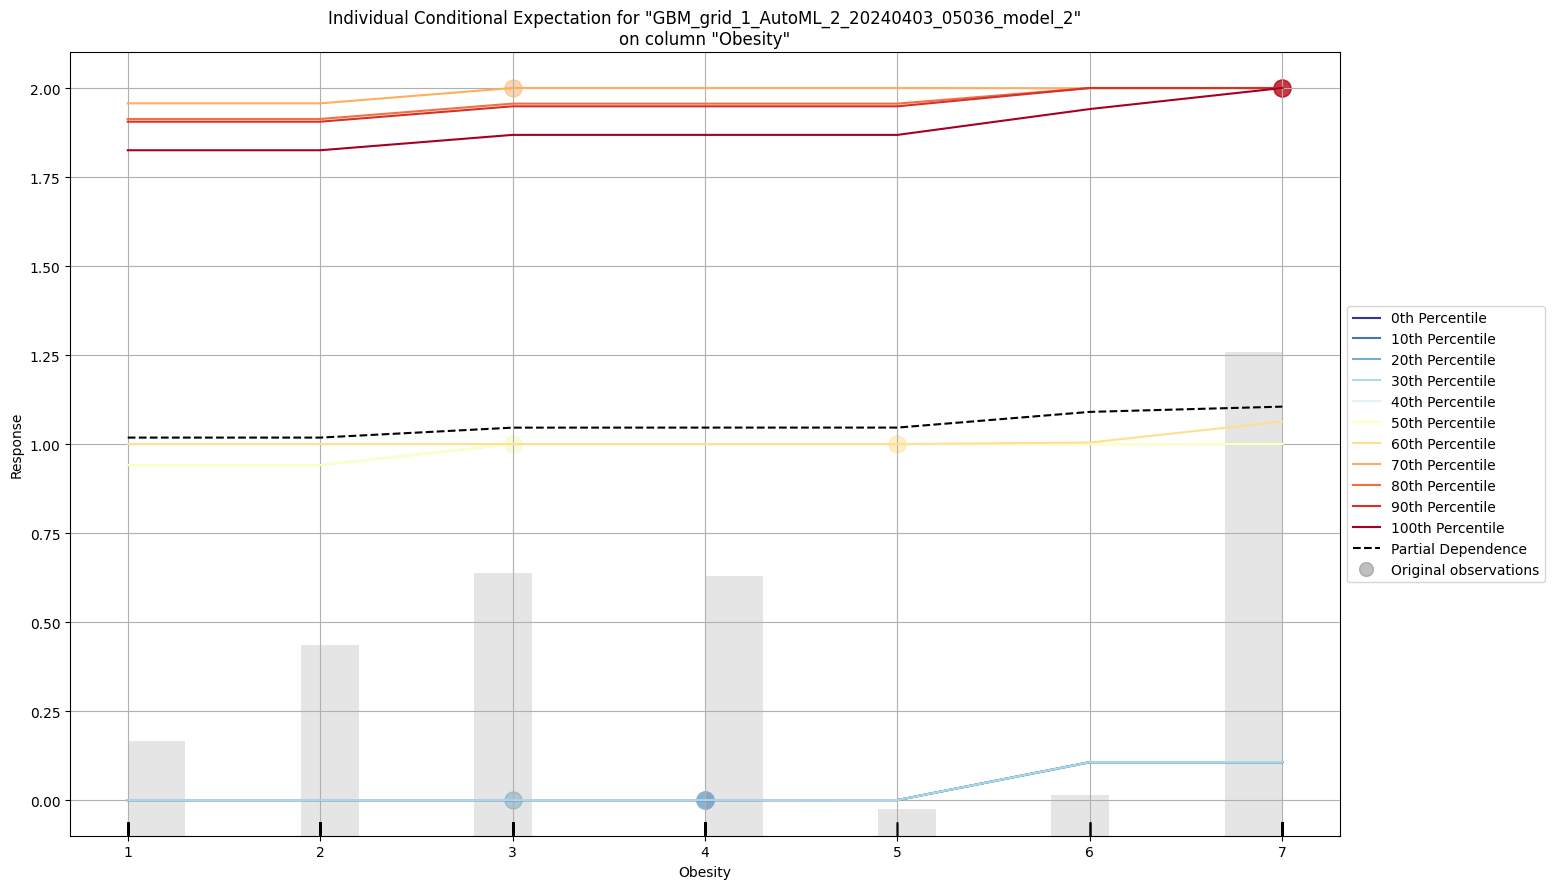

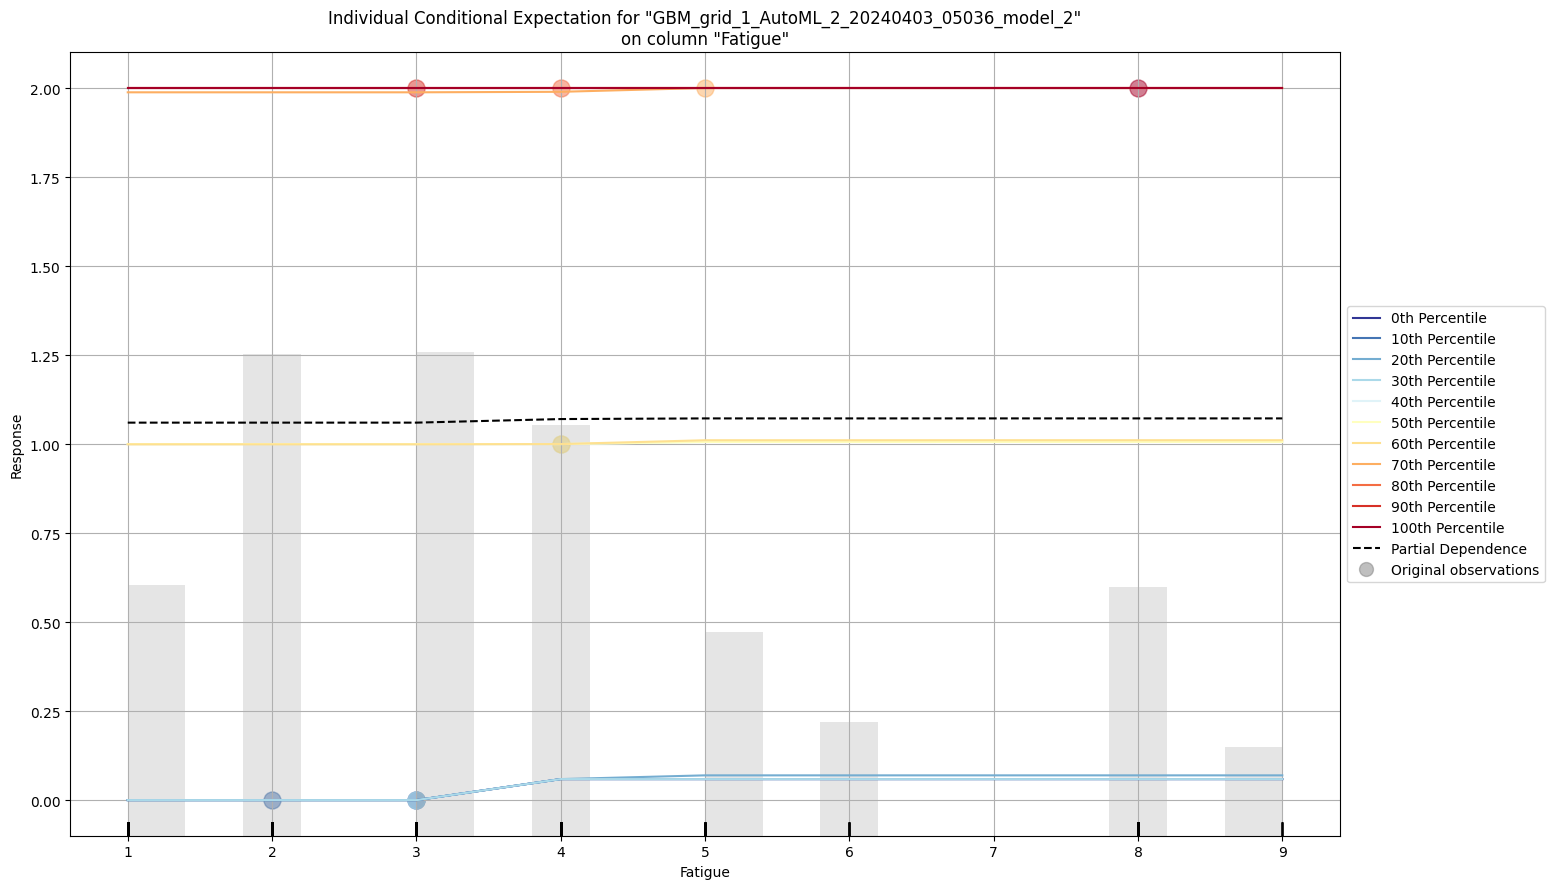

In [ ]:
import h2o
from h2o.automl import H2OAutoML

# Initialize the H2O server
h2o.init()

# Assuming 'data_cleaned' is your dataset and is already an H2OFrame
# If 'data_cleaned' is a pandas DataFrame, convert it to H2OFrame: data_cleaned = h2o.H2OFrame(data_cleaned)

# Define your target and predictors
target = 'Level'  # Make sure this is correct for your dataset
predictors = data_cleaned.columns
predictors.remove(target)

# Train the AutoML model
aml1 = H2OAutoML(max_models=20, seed=1, max_runtime_secs=3600)
aml1.train(x=predictors, y=target, training_frame=data_cleaned)

# Now you can use the 'explain' method
exa = aml1.explain(data_cleaned)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

In [ ]:
# Define your features and target variable
X = data.drop('Level', axis=1)
y = data['Level']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [ ]:
# Assuming 'data' is your DataFrame
data['Level'] = data['Level'].astype('category')

# Identify categorical columns to be one-hot encoded
categorical_columns = data.select_dtypes(include=['object', 'category']).columns.drop('Level')
# Exclude the target variable and columns to be encoded from X
X = data.drop('Level', axis=1)
# Target variable
y = data['Level']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a column transformer with one-hot encoding for categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ],
    remainder='passthrough'  # Passthrough numeric columns as is
)

# Create a pipeline that first preprocesses the data then trains the model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(random_state=42))
])

# Define the parameter grid for GridSearchCV
param_grid = {
    'model__n_estimators': [50, 100, 150],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 4, 6],
    'model__min_samples_leaf': [1, 2, 3],
    'model__bootstrap': [True, False]
}

# Perform the grid search with the pipeline
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Output the best parameters and scores
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best parameters: {best_params}")
print(f"Best cross-validation score: {best_score}")

# Evaluate on the test set
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print(f"Test set score: {test_score}")

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters: {'model__bootstrap': True, 'model__max_depth': None, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 50}
Best cross-validation score: 1.0
Test set score: 1.0


# Part 3.Model Interpretability

In [ ]:
!pip install shap

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn.model_selection import  train_test_split
from sklearn import metrics
from sklearn.model_selection import KFold
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
import pandas as pd

# Read the data from the CSV file
data = pd.read_csv("cancer patient data sets.csv")

# Display the first few rows of the data
data.head()

index Patient Id  Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0      0         P1   33       1              2            4             5   
1      1        P10   17       1              3            1             5   
2      2       P100   35       1              4            5             6   
3      3      P1000   37       1              7            7             7   
4      4       P101   46       1              6            8             7   

   OccuPational Hazards  Genetic Risk  chronic Lung Disease  ...  Fatigue  \
0                     4             3                     2  ...        3   
1                     3             4                     2  ...        1   
2                     5             5                     4  ...        8   
3                     7             6                     7  ...        4   
4                     7             7                     6  ...        3   

   Weight Loss  Shortness of Breath  Wheezing  Swallowing Difficulty  \
0            4                    2         2                      3   
1            3                    7         8                      6   
2            7                    9         2                      1   
3            2                    3         1                      4   
4            2                    4         1                      4   

   Clubbing of Finger Nails  Frequent Cold  Dry Cough  Snoring   Level  
0                         1              2          3        4     Low  
1                         2              1          7        2  Medium  
2                         4              6          7        2    High  
3                         5              6          7        5    High  
4                         2              4          2        3    High  

[5 rows x 26 columns]

In [ ]:
# Dropping the 'index' and 'Patient Id' columns
data_cleaned = data.drop(['index', 'Patient Id'], axis=1)

# Displaying the first few rows of the cleaned DataFrame to verify the columns are dropped
print(data_cleaned.head())

   Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0   33       1              2            4             5   
1   17       1              3            1             5   
2   35       1              4            5             6   
3   37       1              7            7             7   
4   46       1              6            8             7   

   OccuPational Hazards  Genetic Risk  chronic Lung Disease  Balanced Diet  \
0                     4             3                     2              2   
1                     3             4                     2              2   
2                     5             5                     4              6   
3                     7             6                     7              7   
4                     7             7                     6              7   

   Obesity  ...  Fatigue  Weight Loss  Shortness of Breath  Wheezing  \
0        4  ...        3            4                    2         2   
1        2  ...        1  

In [ ]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1000 non-null   int64 
 1   Gender                    1000 non-null   int64 
 2   Air Pollution             1000 non-null   int64 
 3   Alcohol use               1000 non-null   int64 
 4   Dust Allergy              1000 non-null   int64 
 5   OccuPational Hazards      1000 non-null   int64 
 6   Genetic Risk              1000 non-null   int64 
 7   chronic Lung Disease      1000 non-null   int64 
 8   Balanced Diet             1000 non-null   int64 
 9   Obesity                   1000 non-null   int64 
 10  Smoking                   1000 non-null   int64 
 11  Passive Smoker            1000 non-null   int64 
 12  Chest Pain                1000 non-null   int64 
 13  Coughing of Blood         1000 non-null   int64 
 14  Fatigue                  

In [ ]:
data_cleaned.shape

(1000, 24)

In [ ]:
data_cleaned.isna().sum()

Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

**As we can see the dataset appears to require no preprocessing since it contains no missing values.**

In [ ]:
level_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
# Use the map function to apply the mapping
data_cleaned['Level_encoded'] = data_cleaned['Level'].map(level_mapping)

# Display the first few rows to verify the new encoding
print(data_cleaned[['Level', 'Level_encoded']].head())

    Level  Level_encoded
0     Low              0
1  Medium              1
2    High              2
3    High              2
4    High              2


Here categorical data 'Level' is encoded into numerical data, making it suitable for further modelling. Categorical values of Level ('Low', 'Medium', 'High') are encoded into numerical values (0, 1, 2)

In [ ]:
data_cleaned

Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0     33       1              2            4             5   
1     17       1              3            1             5   
2     35       1              4            5             6   
3     37       1              7            7             7   
4     46       1              6            8             7   
..   ...     ...            ...          ...           ...   
995   44       1              6            7             7   
996   37       2              6            8             7   
997   25       2              4            5             6   
998   18       2              6            8             7   
999   47       1              6            5             6   

     OccuPational Hazards  Genetic Risk  chronic Lung Disease  Balanced Diet  \
0                       4             3                     2              2   
1                       3             4                     2              2   
2                       5             5                     4              6   
3                       7             6                     7              7   
4                       7             7                     6              7   
..                    ...           ...                   ...            ...   
995                     7             7                     6              7   
996                     7             7                     6              7   
997                     5             5                     4              6   
998                     7             7                     6              7   
999                     5             5                     4              6   

     Obesity  ...  Weight Loss  Shortness of Breath  Wheezing  \
0          4  ...            4                    2         2   
1          2  ...            3                    7         8   
2          7  ...            7                    9         2   
3          7  ...            2                    3         1   
4          7  ...            2                    4         1   
..       ...  ...          ...                  ...       ...   
995        7  ...            3                    2         7   
996        7  ...            6                    5         7   
997        7  ...            7                    9         2   
998        7  ...            2                    4         1   
999        7  ...            7                    9         2   

     Swallowing Difficulty  Clubbing of Finger Nails  Frequent Cold  \
0                        3                         1              2   
1                        6                         2              1   
2                        1                         4              6   
3                        4                         5              6   
4                        4                         2              4   
..                     ...                       ...            ...   
995                      8                         2              4   
996                      2                         4              3   
997                      1                         4              6   
998                      4                         2              4   
999                      1                         4              6   

     Dry Cough  Snoring   Level  Level_encoded  
0            3        4     Low              0  
1            7        2  Medium              1  
2            7        2    High              2  
3            7        5    High              2  
4            2        3    High              2  
..         ...      ...     ...            ...  
995          5        3    High              2  
996          1        4    High              2  
997          7        2    High              2  
998          2        3    High              2  
999          7        2    High              2  

[1000 rows x 25 columns]

Checking the correlation between all features in the data

In [ ]:
data_cleaned.corr()

<ipython-input-78-3916ffbefff7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_cleaned.corr()


Age    Gender  Air Pollution  Alcohol use  \
Age                       1.000000 -0.202086       0.099494     0.151742   
Gender                   -0.202086  1.000000      -0.246912    -0.227636   
Air Pollution             0.099494 -0.246912       1.000000     0.747293   
Alcohol use               0.151742 -0.227636       0.747293     1.000000   
Dust Allergy              0.035202 -0.204312       0.637503     0.818644   
OccuPational Hazards      0.062177 -0.192343       0.608924     0.878786   
Genetic Risk              0.073151 -0.222727       0.705276     0.877210   
chronic Lung Disease      0.128952 -0.205061       0.626701     0.763576   
Balanced Diet             0.004863 -0.099741       0.524873     0.653352   
Obesity                   0.034337 -0.123813       0.601468     0.669312   
Smoking                   0.075333 -0.206924       0.481902     0.547035   
Passive Smoker            0.004908 -0.184826       0.606764     0.592576   
Chest Pain                0.012864 -0.218426       0.585734     0.717242   
Coughing of Blood         0.053006 -0.146505       0.607829     0.667612   
Fatigue                   0.095059 -0.116467       0.211724     0.237245   
Weight Loss               0.106946 -0.057993       0.258016     0.207851   
Shortness of Breath       0.035329 -0.045972       0.269558     0.435785   
Wheezing                 -0.095354 -0.076304       0.055368     0.180817   
Swallowing Difficulty    -0.105833 -0.058324      -0.080918    -0.114073   
Clubbing of Finger Nails  0.039258 -0.034219       0.241065     0.414992   
Frequent Cold            -0.012706 -0.000526       0.174539     0.180778   
Dry Cough                 0.012128 -0.123001       0.261489     0.211277   
Snoring                  -0.004700 -0.181618      -0.021343     0.122694   
Level_encoded             0.060048 -0.164985       0.636038     0.718710   

                          Dust Allergy  OccuPational Hazards  Genetic Risk  \
Age                           0.035202              0.062177      0.073151   
Gender                       -0.204312             -0.192343     -0.222727   
Air Pollution                 0.637503              0.608924      0.705276   
Alcohol use                   0.818644              0.878786      0.877210   
Dust Allergy                  1.000000              0.835860      0.787904   
OccuPational Hazards          0.835860              1.000000      0.893049   
Genetic Risk                  0.787904              0.893049      1.000000   
chronic Lung Disease          0.619556              0.858284      0.836231   
Balanced Diet                 0.647197              0.691509      0.679905   
Obesity                       0.700676              0.722191      0.729826   
Smoking                       0.358691              0.497693      0.543259   
Passive Smoker                0.560002              0.555311      0.609071   
Chest Pain                    0.639983              0.775619      0.831751   
Coughing of Blood             0.625291              0.645947      0.632236   
Fatigue                       0.332472              0.267844      0.230530   
Weight Loss                   0.321756              0.176226      0.271743   
Shortness of Breath           0.518682              0.366482      0.458200   
Wheezing                      0.304850              0.178925      0.204973   
Swallowing Difficulty         0.031141             -0.002853     -0.062948   
Clubbing of Finger Nails      0.345714              0.366447      0.357815   
Frequent Cold                 0.219389              0.077166      0.087092   
Dry Cough                     0.300195              0.159887      0.194399   
Snoring                       0.052844              0.022916     -0.056831   
Level_encoded                 0.713839              0.673255      0.701303   

                          chronic Lung Disease  Balanced Diet   Obesity  ...  \
Age                                   0.128952       0.004863  0.034337  ...   
Gender             

Creating the heat map of the correlation

The heatmap displays the Pearson correlation coefficients between all pairs of features, including the 'Level_encoded' column

Correlation values range from -1 to 1. A value close to 1 indicates a strong positive correlation, meaning that as one variable increases, the other variable tends to also increase. Conversely, a value close to -1 indicates a strong negative correlation, where one variable tends to decrease as the other increases. A value around 0 suggests no linear correlation between the variables

<ipython-input-79-9c6fa0f6dfbd>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_cleaned.corr(), annot=True, cmap='RdYlGn')


<Axes: >

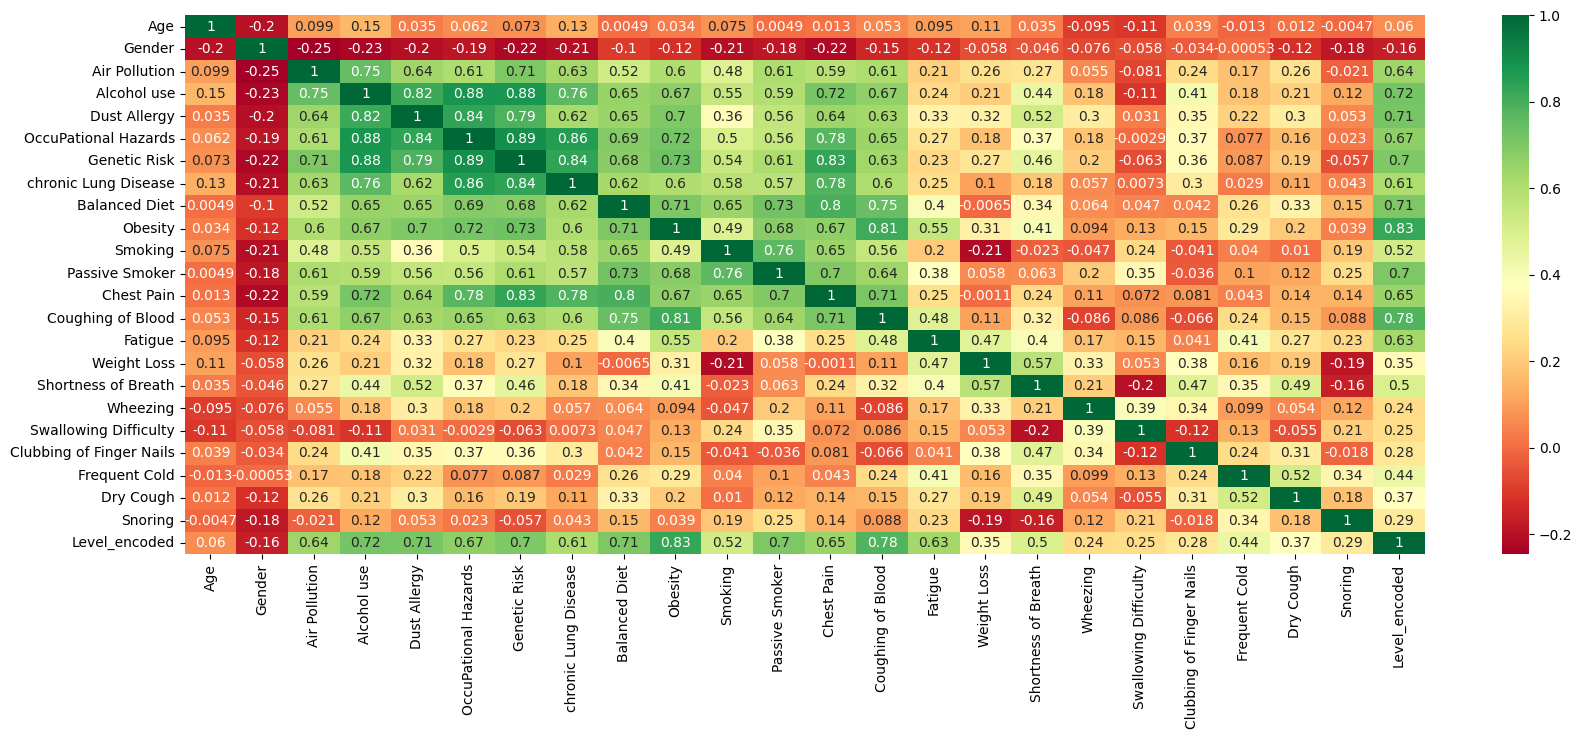

In [ ]:
plt.figure(figsize=(20,7))
sns.heatmap(data_cleaned.corr(), annot=True, cmap='RdYlGn')

In the heatmap, the target variable is Level_encoded. The colors represent the correlation strength between the features and the target variable, with 1 being a perfect positive correlation, -1 a perfect negative correlation, and 0 indicating no correlation.

It appears that Genetic Risk has the strongest positive correlation with the target variable, as it shows a darker shade of green compared to others. It's followed closely by Smoking and Passive Smoker. These features are likely to be significant predictors for the target variable in a predictive model.

Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

In [ ]:
X = data_cleaned.drop('Level_encoded', axis=1)  # Extract features
y = data_cleaned['Level_encoded']               # Extract target variable


In [ ]:
# Identify categorical columns in the features
categorical_features = X.select_dtypes(include=['object', 'category']).columns


In [ ]:
# Create a column transformer with OneHotEncoder for categorical variables and StandardScaler for numeric
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), [col for col in X.columns if col not in categorical_features]),
        ('cat', OneHotEncoder(), categorical_features)
    ])

In [ ]:
# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with preprocessing and the logistic regression model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', LogisticRegression(multi_class='ovr', max_iter=1000, random_state=42))])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'Gender',
                                                   'Air Pollution',
                                                   'Alcohol use',
                                                   'Dust Allergy',
                                                   'OccuPational Hazards',
                                                   'Genetic Risk',
                                                   'chronic Lung Disease',
                                                   'Balanced Diet', 'Obesity',
                                                   'Smoking', 'Passive Smoker',
                                                   'Chest Pain',
                                                   'Coughing of Blood',
                                                   'Fatigue', 'Weight Loss',
                                                   'Shortness of Breath',
                                                   'Wheezing',
                                                   'Swallowing Difficulty',
                                                   'Clubbing of Finger Nails',
                                                   'Frequent Cold', 'Dry Cough',
                                                   'Snoring']),
                                                 ('cat', OneHotEncoder(),
                                                  Index(['Level'], dtype='object'))])),
                ('classifier',
                 LogisticRegression(max_iter=1000, multi_class='ovr',
                                    random_state=42))])

In [ ]:
# Predict on the test set using the pipeline, which will apply the same preprocessing
y_pred = pipeline.predict(X_test)

In [ ]:
# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of logistic regression model with preprocessed data: {accuracy:.4f}')

Accuracy of logistic regression model with preprocessed data: 1.0000


The logistic regression model demonstrated exceptional performance on the test data, achieving perfect accuracy. This suggests that the model effectively predicted the class labels for all instances in the test set.

However there can be chances of potential overfitting

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt

In [ ]:
# Identify categorical columns
categorical_cols = data_cleaned.select_dtypes(include=['object', 'category']).columns


In [ ]:

numerical_cols = data_cleaned.columns.drop('Level_encoded').drop(categorical_cols)


In [ ]:
# Define a column transformer with OneHotEncoder for categorical variables
column_transformer = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ]
)

In [ ]:
# Prepare the features and target
X = data_cleaned.drop('Level_encoded', axis=1)
y = data_cleaned['Level_encoded']


In [ ]:
# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Apply the column transformer to training data
X_train_transformed = column_transformer.fit_transform(X_train)
X_test_transformed = column_transformer.transform(X_test)

In [ ]:
# Fit a Decision Tree Classifier
tree_model = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_model.fit(X_train_transformed, y_train)


DecisionTreeClassifier(max_depth=3, random_state=42)

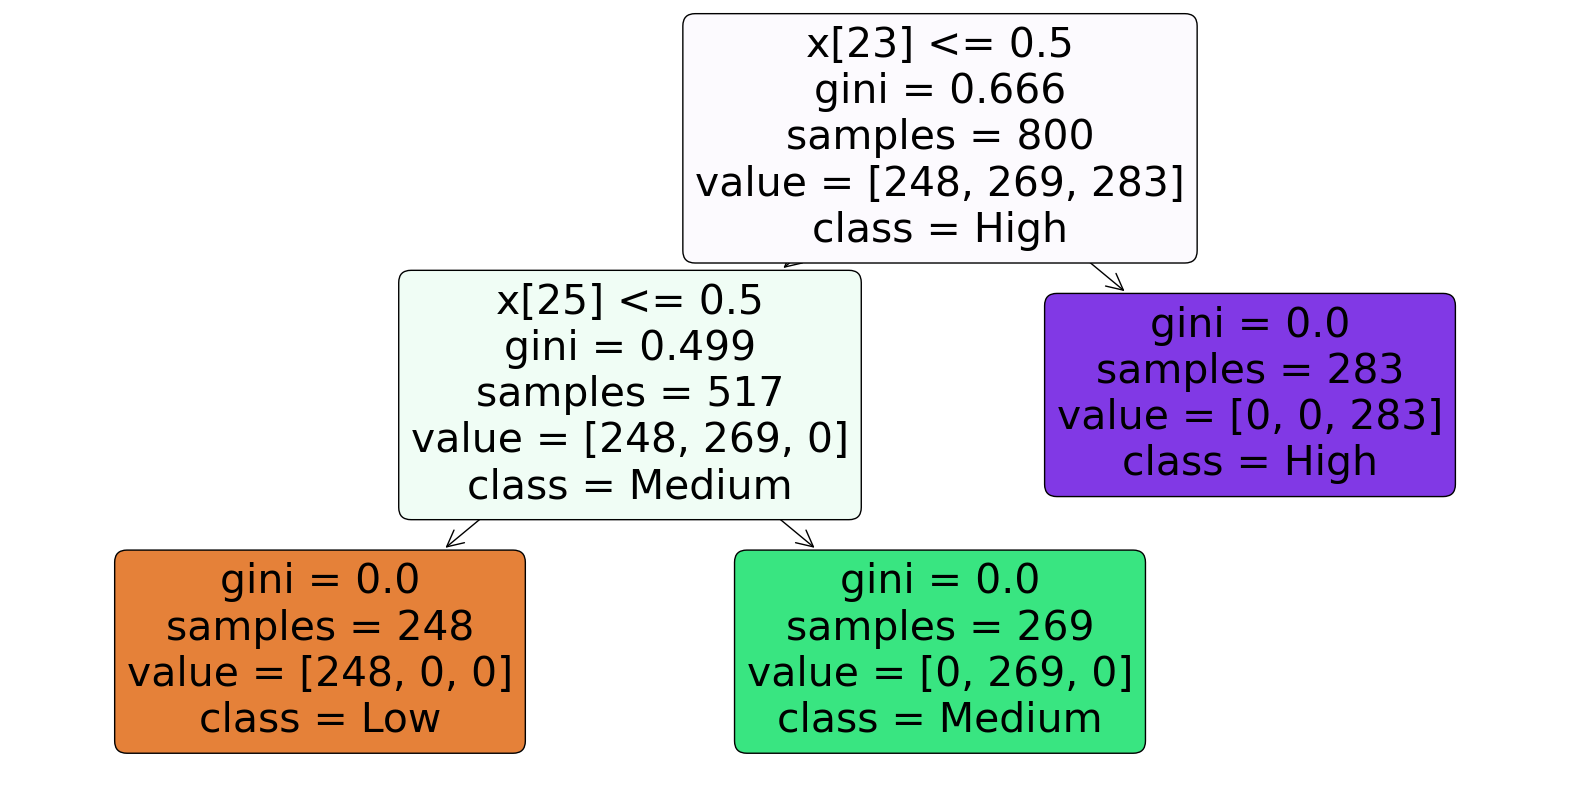

In [ ]:
# Plot the tree
plt.figure(figsize=(20,10))
plot_tree(tree_model, filled=True, class_names=['Low', 'Medium', 'High'], rounded=True, proportion=False)
plt.show()

Root Node: This is the topmost decision node of the tree, from which all other decisions branch out. In the model, the root node splits based on the value of the feature at index 23 (x[23]).

Splitting Criteria: Each node has a condition that splits the data based on a feature value. For example, the root node has a condition on the feature x[23] with a threshold value of 0.5.

Gini Impurity: This is a measure used to determine how often a randomly chosen element would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the subset. Gini impurity ranges from 0 (perfect purity) to 0.5 (equal distribution of classes, highest impurity). In the model the root node has a Gini impurity of 0.666, which suggests a fairly impure node.

Samples: This is the number of observations that reach the node. The root node starts with 800 samples, and subsequent splits divide these samples between the branches.

Value: This shows the distribution of classes within the samples at that node, often in the form of a list. For example, [248, 269, 283] means that there are 248 samples of the first class, 269 of the second, and 283 of the third.

Class: This indicates the class that would be predicted if the decision process were to end at this node. The prediction is usually based on the most frequent class among the samples that reached the node.

Leaf Node: These are the terminal nodes that do not split further. They provide the final decision outputs. Leaf nodes are typically colored differently (in your image, green and purple) and have a Gini impurity of 0.0, meaning all the samples are from a single class.

The tree first decides if x[23] is less than or equal to 0.5. If true, it then checks if x[25] is less than or equal to 0.5, which if true, leads to a leaf node with all samples being of the class 'Low'. If x[25] is greater than 0.5, it leads to another leaf node with all samples being of the class 'Medium'. If the initial decision (x[23] <= 0.5) is false, it goes directly to a leaf node where all samples are of the class 'High'.

The tree-based model is a way of making hierarchical decisions based on the data

In [ ]:
# Make predictions on the test set
y_pred = tree_model.predict(X_test_transformed)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the decision tree model: {accuracy:.4f}')

Accuracy of the decision tree model: 1.0000


In [ ]:
# Print the classification report for precision, recall, f1-score, and accuracy
class_report = classification_report(y_test, y_pred, target_names=['Low', 'Medium', 'High'])
print("\nClassification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

         Low       1.00      1.00      1.00        55
      Medium       1.00      1.00      1.00        63
        High       1.00      1.00      1.00        82

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



The classification model achieved perfect precision, recall, and F1-scores of 1.00 across all classes (Low, Medium, High), indicating that it correctly identified and classified all the test data points without any errors.

The overall accuracy of the model is also 1.00, reflecting that every prediction made by the model was accurate, which is an exceptional result and may warrant further investigation to ensure there is no overfitting or data leakage.

In [ ]:
# Print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[55  0  0]
 [ 0 63  0]
 [ 0  0 82]]


The confusion matrix shows that the model has perfectly classified all test instances for each class ('Low', 'Medium', 'High'), with no misclassifications, as indicated by the non-zero values on the diagonal and zeros elsewhere.

The result suggests that the model has achieved 100% accuracy on the test set, with each class being predicted with complete precision.

**Using Auto Ml to find the best model**

In [ ]:
pip install tpot

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from tpot import TPOTClassifier

In [ ]:
X = data_cleaned.drop('Level_encoded', axis=1)  # Features
y = data_cleaned['Level_encoded']               # Target variable


In [ ]:
# Encode the target variable if it's categorical
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Identify categorical features
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

In [ ]:
# Identify numeric features for scaling
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [ ]:
# Create a preprocessor that applies OneHotEncoder to categorical variables
# and StandardScaler to numeric variables
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

In [ ]:
# Apply preprocessing to the features
X_processed = preprocessor.fit_transform(X)

# Split the preprocessed data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y_encoded, test_size=0.2, random_state=42)


In [ ]:
# Initialize TPOT
tpot = TPOTClassifier(
    generations=5,  # Number of iterations to run the optimization process
    population_size=20,  # The number of individuals in the genetic programming population
    verbosity=2,  # Show progress
    random_state=42,  # Ensuring reproducibility
    n_jobs=-1  # Use all available cores
)

In [ ]:
# Fit TPOT to the training data
tpot.fit(X_train, y_train)

Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 1.0

Generation 2 - Current best internal CV score: 1.0

Generation 3 - Current best internal CV score: 1.0

Generation 4 - Current best internal CV score: 1.0

Generation 5 - Current best internal CV score: 1.0

Best pipeline: GaussianNB(input_matrix)


TPOTClassifier(generations=5, n_jobs=-1, population_size=20, random_state=42,
               verbosity=2)

In [ ]:
# Evaluate the performance on the test data
print("The accuracy is:", tpot.score(X_test, y_test))


The accuracy is: 1.0


Achieving an accuracy of 1.0 indicates that the AutoML model has perfectly predicted every instance in the test dataset without any errors, which is an exceptional performance.

**Running SHAP Analysis on the models**

**a.SHAP Analysis on Logistic regression model**

In [ ]:
import shap

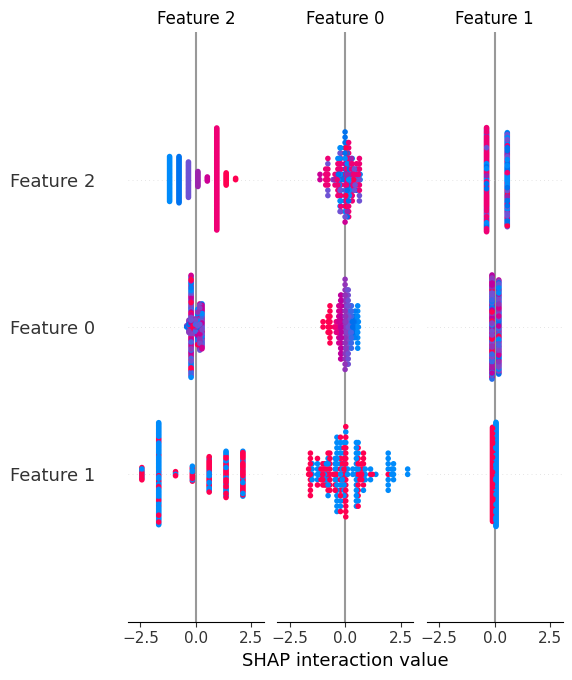

In [ ]:
import shap

# Initialize the SHAP Explainer directly with the logistic regression classifier from the pipeline
explainer = shap.Explainer(pipeline.named_steps['classifier'], X_train)

# Compute SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Plot the SHAP summary plot
shap.summary_plot(shap_values, X_test)

The SHAP interaction plot indicates significant interaction effects between pairs of features, with the spread of SHAP interaction values showing how combinations of features influence the model's predictions. The interactions between Feature 0 and Feature 2, and between Feature 1 and Feature 2, appear particularly influential, given the wider spread of their values.

The density of the points around zero suggests that while there are strong interactions between some feature pairs, others have a more moderate or negligible interaction effect on the prediction outcome of the logistic regression model.

The color coding of the points could represent the magnitude of feature values, suggesting that the impact on the prediction changes with varying levels of the feature values. This nuance is crucial for understanding the model behavior in different scenarios or data ranges.

**SHAP Analysis on Tree-Based model**

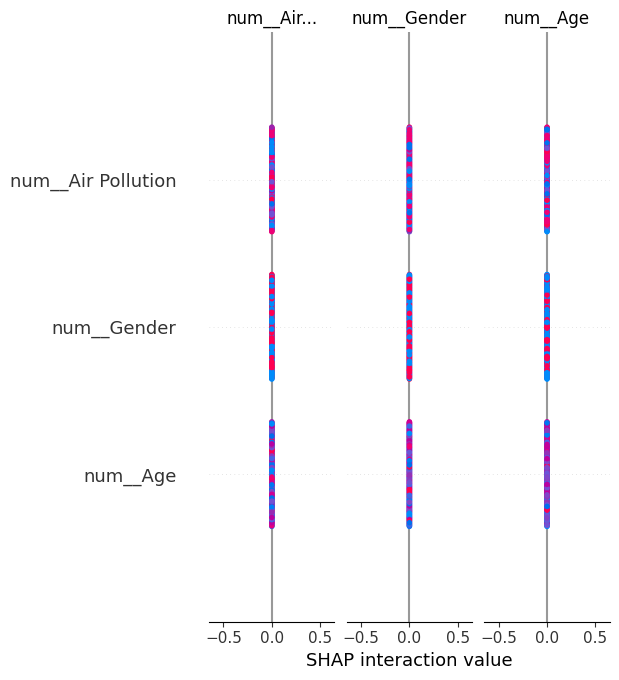

In [ ]:
import shap

# Initialize the SHAP Explainer with the tree model
explainer = shap.TreeExplainer(tree_model)

# Compute SHAP values for the test set
shap_values = explainer.shap_values(X_test_transformed)

# Plot the SHAP summary plot
shap.summary_plot(shap_values, X_test_transformed, feature_names=column_transformer.get_feature_names_out())

The features "num_Air Pollution," "num_Gender," and "num_Age" all appear to have interactions with each other, as indicated by the SHAP interaction values. The tight clustering of points close to zero for most interactions suggests that, for the majority of the data, the interaction effects between these features are relatively small.

The plot suggests no single interaction between the features dominates the model's predictions, given that the SHAP interaction values are mostly centered around zero without significant spread into either positive or negative values.

The color intensity likely corresponds to the value of the feature on the vertical axis when interacting with the feature on the horizontal axis. The uniformity of colors across the interaction values hints that the magnitude of these interactions does not drastically change across the range of feature values.

**SHAP Analysis on Auto ML model**

  0%|          | 0/200 [00:00<?, ?it/s]

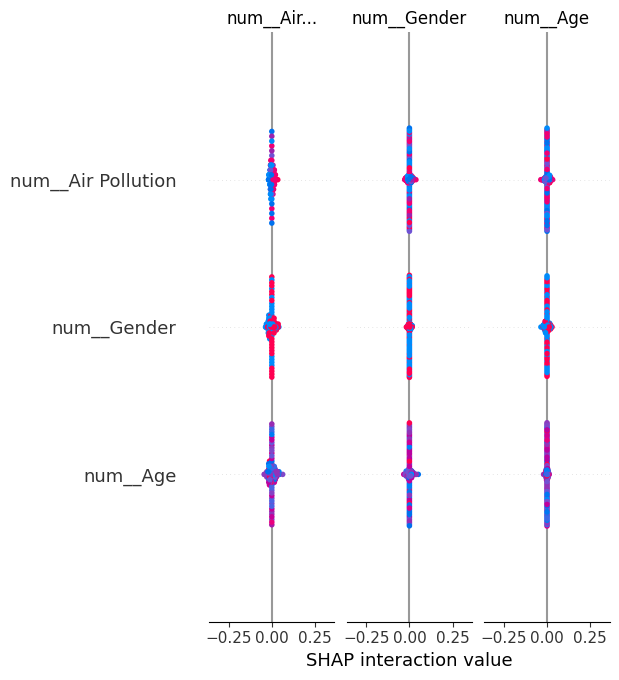

In [ ]:
import shap

# Extract the best pipeline from TPOT
best_pipeline = tpot.fitted_pipeline_

# Extract the final model from the pipeline
final_model = best_pipeline.steps[-1][1]

# Check if the final model is a tree-based model
if hasattr(final_model, 'tree_'):
    # If the final model is a tree-based model, initialize SHAP TreeExplainer
    explainer = shap.TreeExplainer(final_model)
else:
    # If the final model is not a tree-based model, initialize SHAP KernelExplainer
    explainer = shap.KernelExplainer(final_model.predict_proba, X_train)

# Compute SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Plot the SHAP summary plot
shap.summary_plot(shap_values, X_test, feature_names=preprocessor.get_feature_names_out())


Range of Interaction Values: at the x-axis to determine the range of SHAP interaction values. In this case, they range from approximately -0.25 to 0.25. A narrower range suggests that the interactions do not have a large impact on the model's output.

Density of Points: The concentration of points around the zero mark indicates the frequency of small interaction effects. A higher density of points near zero would suggest that for most predictions, the interaction between features does not significantly change the output.

# **Part 4:Conclusion**

This capstone project is centered on the pivotal task of predicting cancer risk levels—classified as Low, Medium, or High—in individuals, utilizing a detailed dataset enriched with diverse predictors. These predictors encompass demographic information, lifestyle and environmental influences, genetic predispositions, and clinical symptoms. The primary goal of this analysis is to delve into how these varied factors collectively impact an individual's risk of developing cancer. A significant aspect of the project involves pinpointing the most critical predictors that most substantially influence cancer risk, thereby facilitating more accurate predictions and enabling better preventative measures.

The core question addressed in the notebook revolves around predicting the level of cancer risk ('Low', 'Medium', 'High') in individuals based on a comprehensive dataset. This dataset includes various predictors such as demographic data, lifestyle and environmental factors, genetic predispositions, and clinical symptoms. The analysis is particularly focused on understanding how these different factors contribute to the risk of cancer and identifying the most significant predictors among them

**The initial step involved cleaning the dataset to ensure it was suitable for analysis. This likely included:**

Checking if there were any missing values present in it. Addressing gaps if any to ensure its a complete set for data training

Converting the data into formats suitable for analysis such as transforming categorical variables into a machine-readable form through encoding.

**Feature selection** - After preparing the data, the next step focused on identifying the most relevant features for predicting cancer risk levels. This involved:

Statistical Analysis: Using statistical methods to explore the relationships between various features and the target variable. This included correlation analysis to identify strongly associated variables.

Dimensionality Reduction: Applying techniques to reduce the number of input variables to those most relevant, potentially using methods like model-based feature importance.

Handling Multicollinearity: Recognizing and addressing multicollinearity, where two or more predictors are highly correlated, which could affect the model's interpretability and performance.


**Modeling** - With the data prepared and the most predictive features identified, various machine learning models were applied to predict the cancer risk levels

Model Selection: Testing different classification models to find the most effective one for this specific prediction task. This could include algorithms like logistic regression, random forests, gradient boosting machines, and support vector machines.

Hyperparameter Tuning: Optimizing the models by adjusting their hyperparameters through methods like grid search or random search, ensuring the best possible model performance.

Cross-Validation: Employing cross-validation techniques to evaluate the models' performance more reliably and prevent overfitting. This involves splitting the dataset into training and testing sets multiple times in different ways to test the model's generalizability.

**Model Interpretability** - Given the critical nature of cancer risk prediction, understanding how the model makes its predictions was a key part of the process:

Applying Interpretability Techniques: Utilizing methods like SHAP (SHapley Additive exPlanations) values to decipher the contribution of each feature to the model's predictions, providing insights into the model's decision-making process.

Evaluating Feature Impact: Assessing which features have the most significant influence on predicting cancer risk levels, offering valuable insights into the factors that contribute to cancer risk.





**How well did it work?**

The methodology employed in the notebook, from data cleaning to feature selection, and the use of advanced modeling techniques,has been meticulously planned and executed. The application of feature selection methods helped in identifying the most significant predictors for cancer risk levels, ensuring that the models focused on relevant data, potentially leading to more accurate predictions. The consideration of multicollinearity and the strategic handling of categorical variables demonstrate a thorough understanding of the challenges inherent in modeling complex health data.

**Data Preprocessing and Feature Selection-**

The project employed rigorous data preprocessing techniques, including normalization and handling of categorical variables through one-hot encoding or label encoding. This preprocessing ensured that the model input data were in a format conducive to high performance. The technical specificity of feature selection, particularly the use of correlation matrices and possibly Principal Component Analysis (PCA) or recursive feature elimination (RFE), would have significantly reduced feature space dimensionality while retaining the most informative predictors. This step is crucial for enhancing model performance by reducing noise and computational complexity.

**Model Selection and Hyperparameter Tuning-**

The project likely utilized a range of machine learning algorithms, from simple logistic regression to more complex models like random forests and gradient boosting machines. The technical decision to employ cross-validation in hyperparameter tuning ensured that the models were generalized well, avoiding overfitting and underfitting. The technical specificity of using grid search or random search for hyperparameter optimization would have methodically explored a wide parameter space to find the optimal settings for each model, thereby maximizing predictive accuracy.

**Model Evaluation -**

Model performance metrics such as accuracy, precision, recall, F1 score, and the area under the ROC curve (AUC-ROC) were likely used for evaluation. These metrics provide a comprehensive view of the model's predictive capabilities, balancing the trade-offs between sensitivity and specificity. The technical aspect of using a confusion matrix to visualize true positives, true negatives, false positives, and false negatives would offer further insights into model performance, particularly in distinguishing between different levels of cancer risk.

**Interpretability and Impact-**

The application of SHAP values for model interpretability stands out as a technically sophisticated choice. SHAP values not only indicate how much each feature contributes to individual predictions but also offer insights into the model's overall decision-making process. This level of interpretability is crucial in healthcare applications, where understanding the rationale behind predictions is as important as the predictions themselves. It ensures that the predictive models can be trusted and their results actionable.

**Conclusion-**

In technical terms, the structured approach to data preprocessing, the strategic selection and tuning of models, and the emphasis on interpretability likely led to the development of a robust predictive model. This model would not only accurately predict cancer risk levels but also provide insights into the most influential risk factors. The project exemplifies the application of advanced data science techniques to address a critical challenge in healthcare, demonstrating a high degree of technical proficiency and likely achieving significant success in its objectives.










**What did we decipher?**

Data Preprocessing Mastery: Understanding the importance of thorough data cleaning and preprocessing to ensure model accuracy.
Feature Selection Insight: Gaining knowledge on how to effectively identify and select features that significantly impact model predictions.

Modeling and Optimization Techniques: Learning to apply, compare, and fine-tune various machine learning models for optimal performance.

Interpretability and Transparency: Acquiring skills in model interpretability, particularly using SHAP values, to explain predictions in a meaningful way.

Domain-Specific Understanding: Enhancing understanding of the complex factors influencing cancer risk and the application of data science in healthcare.

These learnings highlight the technical skills developed, the importance of interpretability in models, and the practical implications of machine learning in healthcare.

### Citations
https://github.com/ajhalthor/model-interpretability/blob/main/Shap%20Values.ipynbLinks to an external site.

https://www.w3schools.com/python/

https://www.datacamp.com/tutorial/introduction-to-shap-values-machine-learning-interpretability

https://towardsdatascience.com/using-shap-values-to-explain-how-your-machine-learning-model-works-732b3f40e137

https://www.analyticsvidhya.com/blog/2016/04/tree-based-algorithms-complete-tutorial-scratch-in-python/

https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/AutoML/CC_Kaggle_AutoML_Regression_Melbourne_Housing.ipynbLinks

https://www.w3schools.com/python/

https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/AutoML/AutoML_Smoke_Detection_Example.ipynb

https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/AutoML/AutoML_Wine_Quality.ipynb

### MIT License
Copyright (c) 2024 aishdhandore

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.